# **STEP 1: Data Importing and Pre-processing**
## - Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
## - Clean, wrangle, and handle missing data
## - Transform data appropriately using techniques such as aggregation, normalization, and feature construction
## - Reduce redundant data and perform need-based discretization

In [1]:
# import all packages used for the project in the first cell, use code cells for code and comments, 
#and use markdown cells for headings and descriptions

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:/Users/mlmug/500B/house_sales.csv", header = 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Basic Characteristics

1. Shape of the data frame

In [4]:
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (21613, 21)


2. Defining file type:

The dataset was provided as a CSV file, which is a plain-text tabular file commonly used for structured data.

2. Data types by column

In [5]:
print("Data types:")
print(df.dtypes)

Data types:
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


3. Missing values

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Cleaning the data

1. Separating missing value columns

In [7]:
cols_na = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot"]

df_na = df[cols_na]


2. Missing percentage in each column

In [8]:
missing_percent = (df_na.isna().sum() / len (df_na)) * 100
print ("Missing percent: \n", missing_percent)

Missing percent: 
 bedrooms       5.246842
bathrooms      4.941470
sqft_living    5.135798
sqft_lot       4.830426
dtype: float64


4. Distribution in missing value columns

In [9]:
df["bedrooms"].describe()

count    20479.000000
mean         3.372821
std          0.930711
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [10]:
df["bathrooms"].describe()

count    20545.000000
mean         2.113507
std          0.768913
min          0.000000
25%          1.500000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

5. Filling in missing values

    a. bedrooms
        This columns missing percentage is under 10% and the variable is discrete with clear central tendency. Most homes have 3 bedrooms, due to outliers, the mean would not be a reliable choice. The median is more robust to those outliers and better represents a typical value. For these reasons, the median, was used to fill the missing bedroom values. 

In [11]:
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median())

    b. bathrooms

In [12]:
df["bathrooms"] = df ["bathrooms"].fillna(df["bathrooms"].median())

    c. sqft_living 
    Missing values in this columns were filled using the median for each bedroom count to keep estimates accruate. sqft_living15 was avoided becasue it represents nearby homes, not the specific property.
    
        

In [13]:
for b in sorted(df['bedrooms'].unique()):
    
    mis_sq = (df['bedrooms'] == b) & (df['sqft_living'].isna())

    median_sqft = df.loc[df['bedrooms'] == b, 'sqft_living'].median()

    df.loc[mis_sq, 'sqft_living'] = median_sqft

    d. sqft_lot
        Misisng values in sqft_lot were filled by using median lot size within each zip code. Lot size varies heavily by location, so grouping by zip code provides more realistic estimates than using one overall median. 

In [14]:
for z in sorted(df['zipcode'].unique()):
    
    zip = (df['zipcode'] == z) & (df['sqft_lot'].isna())
    
    median_lot = df.loc[df['zipcode'] == z, 'sqft_lot'].median()
    
    df.loc[zip, 'sqft_lot'] = median_lot

                                  

 6. Converting data types

    a. date
        The date column was converted to datetime to allow accurate time-based calculations and avoid treating the values as plain text, 

In [15]:
df['date'] = pd.to_datetime(df['date'])

df['date'].head()
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

7. Duplicate checks and redundant data

In [16]:
df.duplicated().sum()

np.int64(0)

8. Impossible data

In [17]:
df[df['bedrooms'] < 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [18]:
df[df['bathrooms'] < 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [19]:
df[df['floors'] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [20]:
df[df['sqft_living'] <= 0]
df[df['sqft_lot'] <= 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [21]:
df[df['price'] <= 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


9. Outliers
    
    a. bedrooms
       A single extreme outlier was found in the bedrooms column where a property was listed with 33 bedroomsl. Based on the sq footage of the home, bathrooms and price, this was ultimatley determined to be a data entry error, and the value was corrected to 3.

In [22]:
col = 'bedrooms'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df[(df[col] < lower) | (df[col] > upper)][['bedrooms']]


,bedrooms
154,1.0
209,6.0
232,6.0
239,6.0
264,1.0
...,...
21375,6.0
21443,1.0
21519,1.0
21522,6.0


In [23]:
df ['bedrooms'].describe()

count    21613.00000
mean         3.35326
std          0.90977
min          0.00000
25%          3.00000
50%          3.00000
75%          4.00000
max         33.00000
Name: bedrooms, dtype: float64

In [24]:
df[df['bedrooms'] > 10][['bedrooms']]

,bedrooms
15870,33.0


In [25]:
df.loc[15870]

id                        2402100895
date             2014-06-25 00:00:00
price                       640000.0
bedrooms                        33.0
bathrooms                       1.75
sqft_living                   1620.0
sqft_lot                      6000.0
floors                           1.0
waterfront                         0
view                               0
condition                          5
grade                              7
sqft_above                      1040
sqft_basement                    580
yr_built                        1947
yr_renovated                       0
zipcode                        98103
lat                          47.6878
long                        -122.331
sqft_living15                   1330
sqft_lot15                      4700
Name: 15870, dtype: object

In [26]:
df.loc[15870, 'bedrooms'] = 3

    b. bathrooms

In [27]:
df['bathrooms'].describe

<bound method NDFrame.describe of 0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64>

In [28]:
df['bathrooms'].sort_values().head(10)
df['bathrooms'].sort_values(ascending=False).head(10)

12777    8.00
7252     8.00
9254     7.75
8546     7.50
8092     6.75
20578    6.50
21506    6.50
14556    6.25
18302    6.25
4035     6.00
Name: bathrooms, dtype: float64

    c. sqft_living

In [29]:
df['sqft_living'].describe()
df['sqft_living'].sort_values().head(20)
df['sqft_living'].sort_values(ascending=False).head(20)

7252     12050.0
3914     10040.0
8092      9640.0
4411      9200.0
14556     8670.0
18302     8020.0
1164      8010.0
1448      8000.0
13411     7880.0
19858     7850.0
16773     7730.0
18477     7710.0
14032     7620.0
4024      7480.0
12370     7440.0
11871     7420.0
10373     7400.0
1315      7390.0
2713      7350.0
18594     7320.0
Name: sqft_living, dtype: float64

    d. sqft_lot

In [30]:
df['sqft_lot'].describe()
df['sqft_lot'].sort_values().head(10)
df['sqft_lot'].sort_values(ascending=False).head(10)

1719     1651359.0
17319    1164794.0
7647     1074218.0
3949      982998.0
4441      982278.0
6691      920423.0
7077      881654.0
9714      871200.0
20452     871200.0
4540      843309.0
Name: sqft_lot, dtype: float64

    e. floors

In [31]:
df['floors'].describe()
df['floors'].sort_values().head(10)
df['floors'].sort_values(ascending=False).head(10)

18477    3.5
875      3.5
20308    3.5
11594    3.5
20772    3.5
10077    3.5
14885    3.5
15424    3.5
19757    3.0
20070    3.0
Name: floors, dtype: float64

    f. condition

In [32]:
df['condition'].describe()
df['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

    g. grade

In [33]:
df['grade'].describe()
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

    h. yr_built

In [34]:
df['yr_built'].sort_values().head(10)
df['yr_built'].sort_values(ascending=False).head(10)

21369    2015
1763     2015
21262    2015
14215    2015
20852    2015
20963    2015
14925    2015
19907    2015
21333    2015
7526     2015
Name: yr_built, dtype: int64

    i. sqft_living15

In [35]:
df['sqft_living15'].describe()
df['sqft_living15'].sort_values().head(10)
df['sqft_living15'].sort_values(ascending=False).head(10)

19858    6210
10373    6110
21540    5790
20563    5790
16430    5790
1123     5790
20830    5790
5451     5790
11871    5610
1530     5600
Name: sqft_living15, dtype: int64

    j. sqft_lot15

In [36]:
df['sqft_lot15'].describe()
df['sqft_lot15'].sort_values().head(10)
df['sqft_lot15'].sort_values(ascending=False).head(10)

9714     871200
20452    858132
13464    560617
8664     438213
3801     434728
1719     425581
19156    422967
6691     411962
21431    392040
15620    392040
Name: sqft_lot15, dtype: int64

    k. price

In [37]:
df.sort_values('price', ascending=True).head(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,2015-02-17,75000.0,1.0,0.00,670.0,43377.0,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,2014-05-06,78000.0,2.0,1.00,780.0,8842.5,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,2014-05-23,80000.0,1.0,0.75,430.0,5050.0,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,2015-03-24,81000.0,3.0,2.25,730.0,9975.0,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,2014-11-05,82000.0,3.0,1.00,860.0,10426.0,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
2141,1623049041,2014-05-08,82500.0,2.0,1.00,520.0,22334.0,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
18468,7999600180,2014-05-29,83000.0,2.0,1.00,900.0,8580.0,1.0,0,0,...,5,900,0,1918,0,98168,47.4727,-122.270,2060,6533
3767,1523049188,2015-04-30,84000.0,2.0,1.00,700.0,20130.0,1.0,0,0,...,6,700,0,1949,0,98168,47.4752,-122.271,1490,18630
16714,1322049150,2015-03-05,85000.0,2.0,1.00,910.0,9753.0,1.0,0,0,...,5,910,0,1947,0,98032,47.3897,-122.236,1160,7405
10253,2422049104,2014-09-15,85000.0,2.0,1.00,830.0,9000.0,1.0,0,0,...,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680


In [38]:
df.sort_values('price', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6.0,8.00,12050.0,27600.0,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5.0,4.50,10040.0,37325.0,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000.0,6.0,7.75,2940.0,31374.0,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5.0,5.75,9200.0,16818.5,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5.0,5.00,8000.0,23985.0,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,2015-04-13,5300000.0,6.0,6.00,7390.0,24829.0,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,2014-10-20,5110800.0,5.0,5.25,8010.0,45517.0,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,2014-06-17,4668000.0,5.0,6.75,9640.0,13068.0,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,2014-08-15,4500000.0,5.0,5.50,6640.0,40014.0,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,2014-06-18,4489000.0,4.0,3.00,6430.0,27517.0,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


10. Validation

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [40]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.351872,2.120252,2072.164438,1.485375e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1440.000000,5.080000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1900.000000,7.663000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2520.000000,1.050000e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.887140,0.750257,899.270450,4.051167e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [41]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# **STEP 2: Data Analysis and Visualization**
## -Identify categorical, ordinal, and numerical variables within the data
## -Provide measures of centrality and distribution with visualizations
## -Diagnose for correlations between variables and determine independent and dependent variables
## -Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

**2.1 Identify categorical, ordinal, and numerical values within the data.**

In [42]:
total_num_columns = df.shape[1]
print(total_num_columns)

21


In [43]:
# Possible data types in pandas include numbers (integer and float), objects, strings, datetimes, timedeltas, categories, and datetimez.

numerical_col = df.select_dtypes(include = 'number').columns
numerical_col_count = len(numerical_col)
print("Numerical data =", list(numerical_col))
print("Number of numerical columns =", numerical_col_count)

Numerical data = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Number of numerical columns = 20


Pandas. Dataframe. Select_dtypes—Pandas 2. 3. 3 documentation. (n.d.). Retrieved November 24, 2025, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [44]:
# Of the 21 columns, 20 are numerical. Therefore, there is one remaining non-numerical column.
# The process for numerical data will be repeated for object, datetime, and categorical data.

# object data
object_col = df.select_dtypes(include = 'object').columns
object_col_count = len(object_col)
print("Object data =", list(object_col))
print("Number of object columns =", object_col_count)

# datetimes
datetime_col = df.select_dtypes(include = 'datetime64').columns
datetime_col_count = len(datetime_col)
print("Datetime data =", list(datetime_col))
print("Number of datetime columns =", datetime_col_count)

# categories
categorical_col = df.select_dtypes(include = 'category').columns
categorical_col_count = len(categorical_col)
print("Categorical data =", list(categorical_col))
print("Number of categorical columns =", categorical_col_count)

Object data = []
Number of object columns = 0
Datetime data = ['date']
Number of datetime columns = 1
Categorical data = []
Number of categorical columns = 0


In [45]:
data_types = df.dtypes
data_types

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

Of the 21 total columns in the house sales data frame, **20 contain numerical data and 1 contains ordinal, specifically datetime, data**.
The output from the earlier script was verified with df.dtypes. The listed data types align with the df.info() output from Step 1.

**2.2 Provide measures of centrality and distributions with visualizations.**

In [46]:
# date
# Dates are not technically a continuous dataset, therefore, it does not make sense to calculate the mean.

print("median date =", df['date'].median())
print("mode date = ", df['date'].mode())

median date = 2014-10-16 00:00:00
mode date =  0   2014-06-23
Name: date, dtype: datetime64[ns]


In [47]:
# Using the square root of the number of entries to determine the number of boxes.

import math

print(round(math.sqrt(21613), 2))

147.01


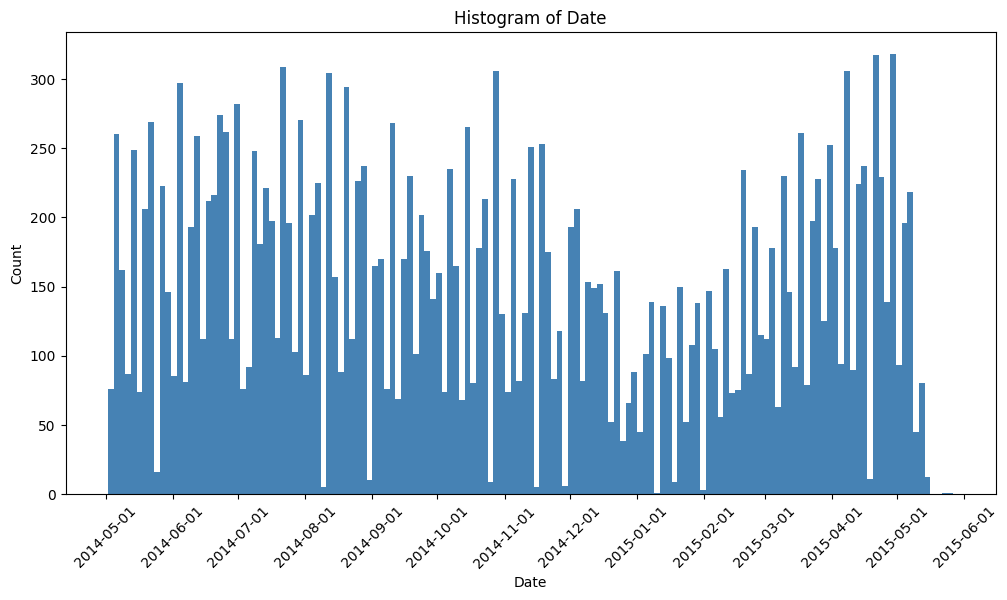

In [48]:
# Plotting a histogram to look at the spread of the data.

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure width
ax.hist(df['date'], bins=147, color = 'steelblue', edgecolor='none')
ax.set_title ('Histogram of Date')
ax.set_xlabel('Date')
ax.set_ylabel('Count')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.show()

I used ChatGPT to help me reformat the histogram. Originally, the figure was too small to draw any conclusions. Therefore, I entered my original code (plt.hist()), and ChatGPT helped me to set the values as dates, replot the data using Axes, rather than pyplot, expand the x-axis, and increase the number of intervals to visualize the fluctuations over time.

Chatgpt. (n.d.). ChatGPT. Retrieved November 24, 2025, from https://chatgpt.com/

In [49]:
# price

print("mean price = $", df['price'].mean().round(2))
print("median price = $", df['price'].median())
print("mode price = $", df['price'].mode())

mean price = $ 540088.14
median price = $ 450000.0
mode price = $ 0    350000.0
1    450000.0
Name: price, dtype: float64


In [50]:
# The previous result suggests that there are two modes: $350,000.00 and $450,000.00, so I want to count the number of rows with those prices.

df.loc[df['price'] == 350000,'price']

154      350000.0
443      350000.0
724      350000.0
831      350000.0
939      350000.0
           ...   
20908    350000.0
20990    350000.0
21393    350000.0
21398    350000.0
21594    350000.0
Name: price, Length: 172, dtype: float64

In [51]:
df.loc[df['price'] == 450000,'price']

48       450000.0
276      450000.0
376      450000.0
406      450000.0
773      450000.0
           ...   
21020    450000.0
21122    450000.0
21152    450000.0
21198    450000.0
21456    450000.0
Name: price, Length: 172, dtype: float64

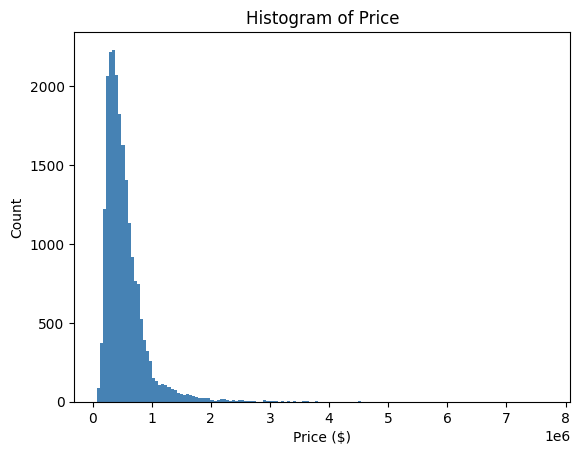

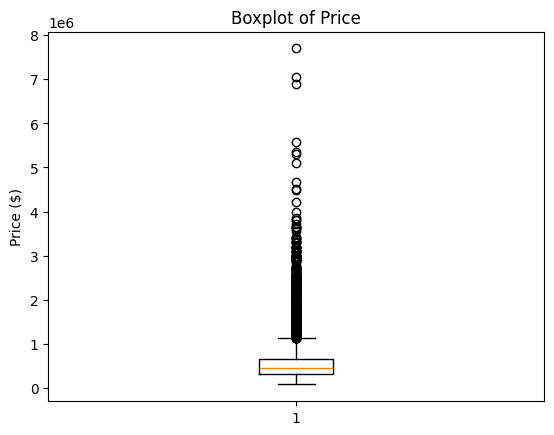

In [52]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['price'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Price')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['price'])
plt.title ('Boxplot of Price')
plt.ylabel('Price ($)')
plt.show()

In [53]:
# bedrooms
# The number of bedrooms is not a continuous dataset, therefore, it does not make sense to calculate the mean.

print("median bedrooms =", df['bedrooms'].median())
print("mode bedrooms =", df['bedrooms'].mode())
print("max number of bedrooms =", df['bedrooms'].max())
print("min number of bedrooms =", df['bedrooms'].min())

median bedrooms = 3.0
mode bedrooms = 0    3.0
Name: bedrooms, dtype: float64
max number of bedrooms = 10.0
min number of bedrooms = 0.0


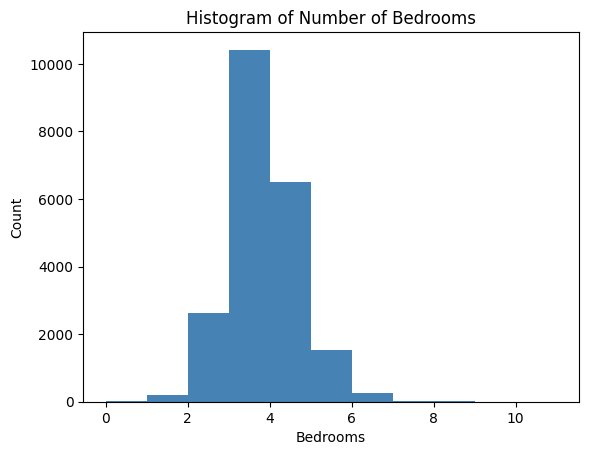

In [54]:
# Plotting a histogram to look at the spread of the data.
# The range of number of bedrooms is 0 to 10, therefore 10 bins are used in the histogram.

fig = plt.figure()
plt.hist(df['bedrooms'], bins=11, range = (0, 11), color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

In [55]:
# bathrooms
# The number of bathrooms is not a continuous dataset, therefore, it does not make sense to calculate the mean.

print("median bathrooms =", df['bathrooms'].median())
print("mode bathrooms =", df['bathrooms'].mode())
print("max number of bathrooms =", df['bathrooms'].max())
print("min number of bathrooms =", df['bathrooms'].min())

median bathrooms = 2.25
mode bathrooms = 0    2.5
Name: bathrooms, dtype: float64
max number of bathrooms = 8.0
min number of bathrooms = 0.0


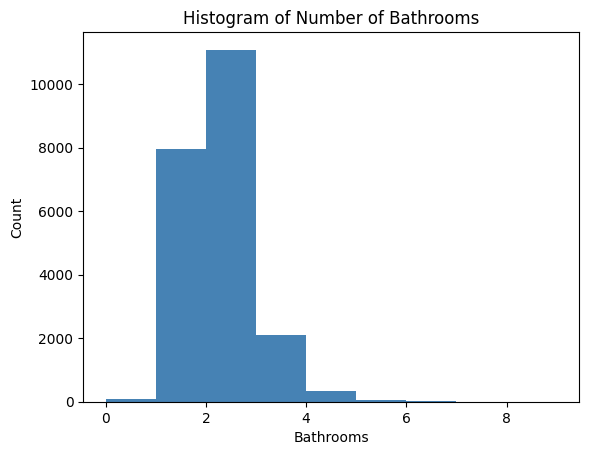

In [56]:
# Plotting a histogram to look at the spread of the data.
# The range of number of bathrooms is 0 to 8, therefore 8 bins are used in the histogram.

fig = plt.figure()
plt.hist(df['bathrooms'], bins=9, range = (0, 9), color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [57]:
# sqft_living

print("mean living sqft =", df['sqft_living'].mean().round(2), "ft\u00b2")
print("median living sqft =", df['sqft_living'].median(), "ft\u00b2")
print("mode living sqft =", df['sqft_living'].mode(), "ft\u00b2")

mean living sqft = 2072.16 ft²
median living sqft = 1900.0 ft²
mode living sqft = 0    1690.0
Name: sqft_living, dtype: float64 ft²


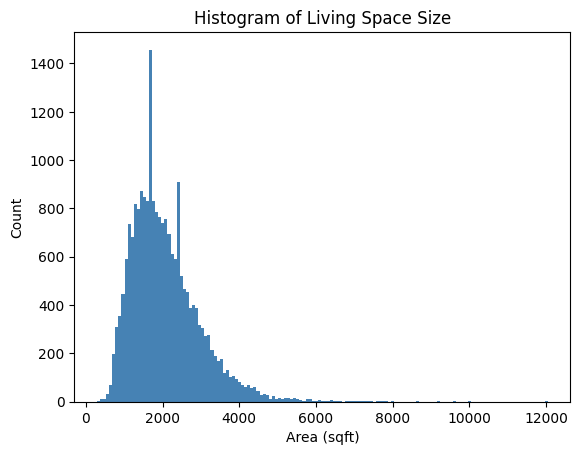

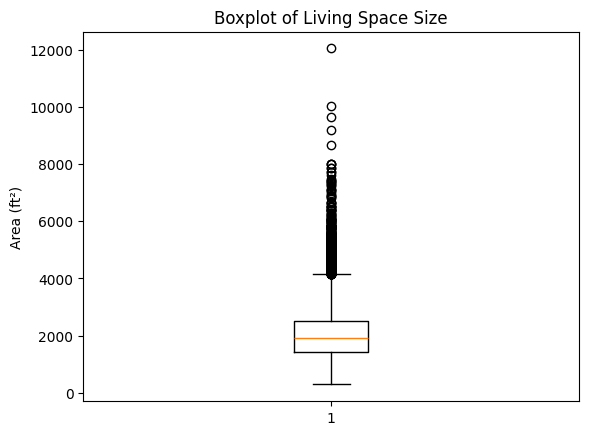

In [58]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_living'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Living Space Size')
plt.xlabel('Area (sqft)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_living'])
plt.title ('Boxplot of Living Space Size')
plt.ylabel('Area (ft\u00b2)')
plt.show()

In [59]:
# sqft_lot

print("mean lot sqft =", df['sqft_lot'].mean().round(2), "ft\u00b2")
print("median lot sqft =", df['sqft_lot'].median(), "ft\u00b2")
print("mode lot sqft =", df['sqft_lot'].mode(), "ft\u00b2")

mean lot sqft = 14853.75 ft²
median lot sqft = 7663.0 ft²
mode lot sqft = 0    5000.0
Name: sqft_lot, dtype: float64 ft²


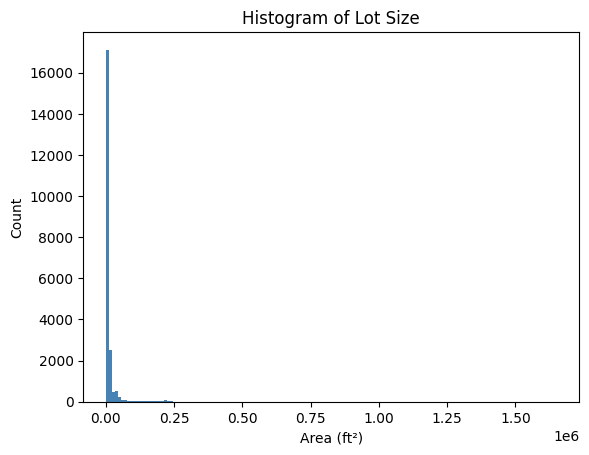

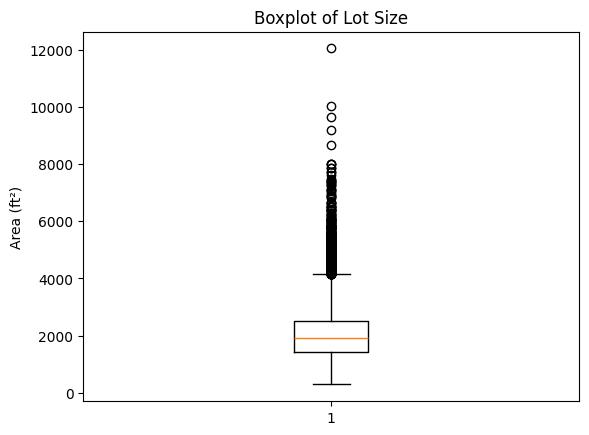

In [60]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_lot'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Lot Size')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_living'])
plt.title ('Boxplot of Lot Size')
plt.ylabel('Area (ft\u00b2)')
plt.show()

In [61]:
# floors
# The number of floors is not a continuous dataset, therefore, it does not make sense to calculate the mean.

print("median floors =", df['floors'].median())
print("mode floors =", df['floors'].mode())
print("max number of floors =", df['floors'].max())
print("min number of floors =", df['floors'].min())

median floors = 1.5
mode floors = 0    1.0
Name: floors, dtype: float64
max number of floors = 3.5
min number of floors = 1.0


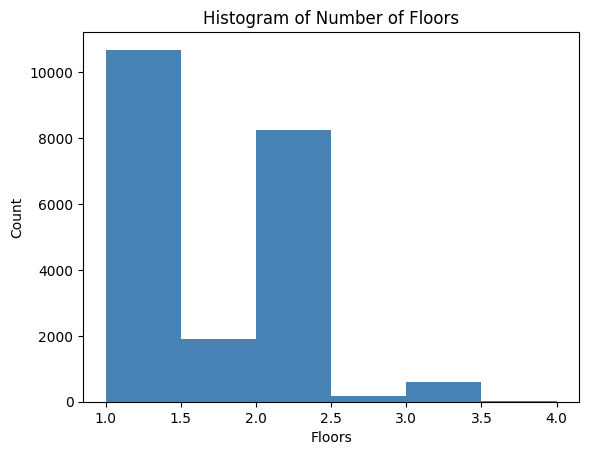

In [62]:
# Plotting a histogram to look at the spread of the data.
# The range of number of bathrooms is 1 to 3.5, therefore 6 bins are used in the histogram.

fig = plt.figure()
plt.hist(df['floors'], bins = 6, range = (1, 4), color = 'steelblue', edgecolor = 'none')
plt.title ('Histogram of Number of Floors')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.show()

In [63]:
# waterfront
# The presence (=1) or absence (=0) of a waterfront view is binary, therefore, it does not make sense to calculate the median.
# Although the dataset is a binary, the mean can illuminate a intermediate measure of centrality between 0 and 1.

print("mean waterfront =", df['waterfront'].mean())
print("mode waterfront =", df['waterfront'].mode())

mean waterfront = 0.007541757275713691
mode waterfront = 0    0
Name: waterfront, dtype: int64


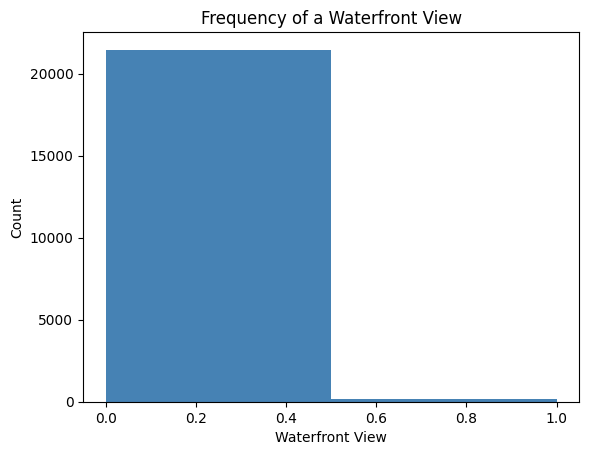

In [64]:
# Plotting a histogram to look at the frequency of a waterfront view.
# The presence or absence of a waterfront view is a binary dataset. Therefore only 2 bins are needed.

fig = plt.figure()
plt.hist(df['waterfront'], bins = 2, color = 'steelblue', edgecolor = 'none')
plt.title ('Frequency of a Waterfront View')
plt.xlabel('Waterfront View')
plt.ylabel('Count')
plt.show()

In [65]:
# view
# The presence (=1) or absence (=0) of a view is binary, therefore, it does not make sense to calculate the median.
# Although the dataset is a binary, the mean can illuminate a intermediate measure of centrality between 0 and 1.

print("mean view =", df['view'].mean())
print("median view =", df['view'].median())
print("mode view =", df['view'].mode())
print("max score of view =", df['view'].max())
print("min score of view =", df['view'].min())

mean view = 0.23430342849211122
median view = 0.0
mode view = 0    0
Name: view, dtype: int64
max score of view = 4
min score of view = 0


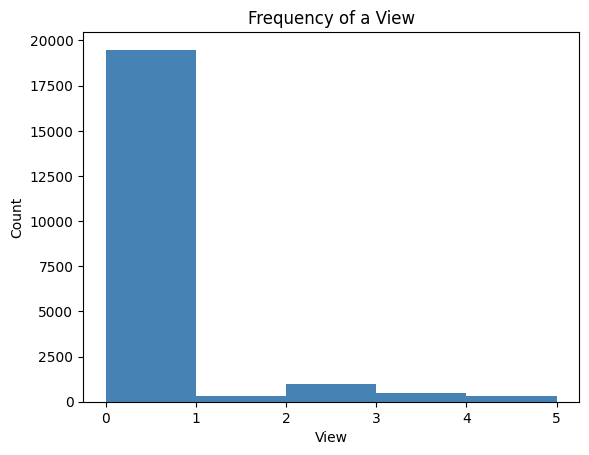

In [66]:
# Plotting a histogram to look at the frequency of a view.
# The presence or absence of a view is a binary dataset. Therefore only 2 bins are needed.

fig = plt.figure()
plt.hist(df['view'], bins = 5, range = (0, 5), color = 'steelblue', edgecolor = 'none')
plt.title ('Frequency of a View')
plt.xlabel('View')
plt.ylabel('Count')
plt.show()

In [67]:
# condition
# The score of the condition is not a continuous dataset, therefore, it does not make sense to calculate the mean.

print("median condition =", df['condition'].median())
print("mode condition =", df['condition'].mode())
print("max score of condition =", df['condition'].max())
print("min score of condition =", df['condition'].min())

median condition = 3.0
mode condition = 0    3
Name: condition, dtype: int64
max score of condition = 5
min score of condition = 1


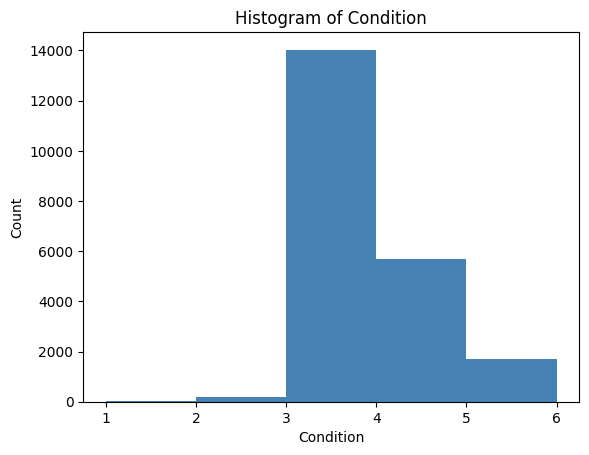

In [68]:
# Plotting a histogram to look at the spread of the data.
# The range of condition scores is 1 to 5, therefore 4 bins are used in the histogram.

fig = plt.figure()
plt.hist(df['condition'], bins = 5, range = (1, 6), color = 'steelblue', edgecolor = 'none')
plt.title ('Histogram of Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

In [69]:
# grade
# The grade is not a continuous dataset, therefore, it does not make sense to calculate the mean.

print("median grade =", df['grade'].median())
print("mode grade =", df['grade'].mode())
print("max score of grade =", df['grade'].max())
print("min score of grade =", df['grade'].min())

median grade = 7.0
mode grade = 0    7
Name: grade, dtype: int64
max score of grade = 13
min score of grade = 1


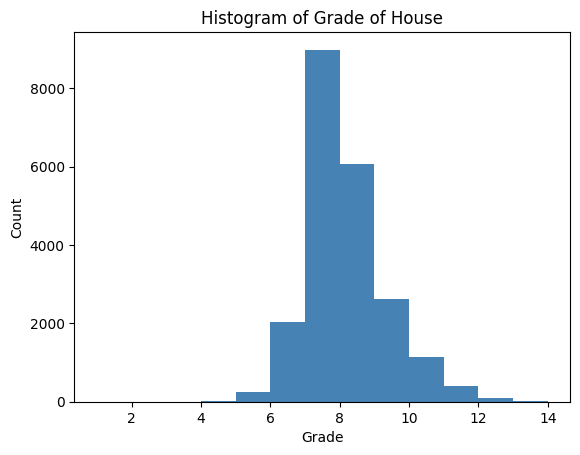

In [70]:
# Plotting a histogram to look at the spread of the data.
# The range of grades is 1 to 13, therefore 12 bins are used in the histogram.

fig = plt.figure()
plt.hist(df['grade'], bins = 13, range = (1, 14), color = 'steelblue', edgecolor = 'none')
plt.title ('Histogram of Grade of House')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

In [71]:
# sqft_above

print("mean sqft above =", df['sqft_above'].mean().round(1), "ft\u00b2")
print("median sqft above =", df['sqft_above'].median(), "ft\u00b2")
print("mode sqft above =", df['sqft_above'].mode(), "ft\u00b2")

mean sqft above = 1788.4 ft²
median sqft above = 1560.0 ft²
mode sqft above = 0    1300
Name: sqft_above, dtype: int64 ft²


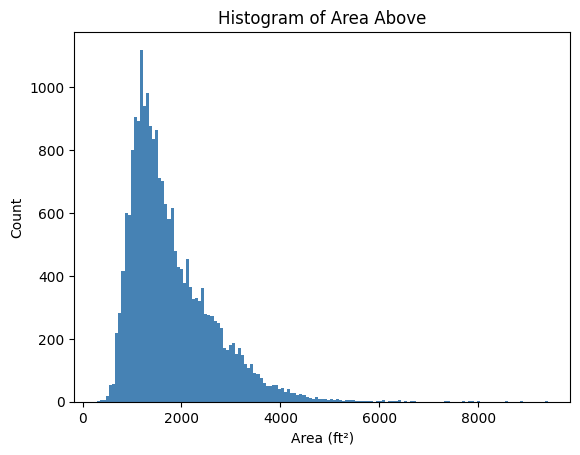

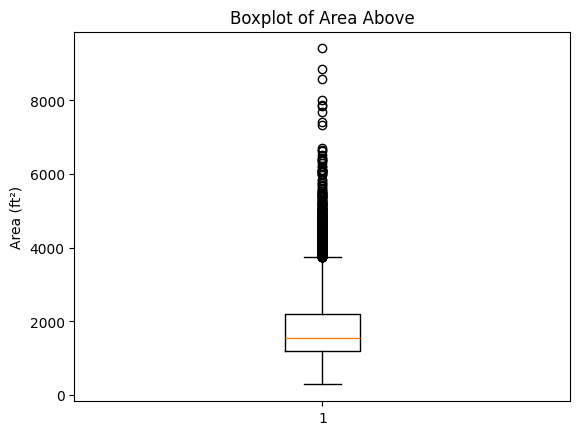

In [72]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_above'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Area Above')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_above'])
plt.title ('Boxplot of Area Above')
plt.ylabel('Area (ft\u00b2)')
plt.show()

In [73]:
# sqft_basement

print("mean basement sqft =", df['sqft_basement'].mean().round(1))
print("median basement sqft =", df['sqft_basement'].median())
print("mode basement sqft =", df['sqft_basement'].mode())

mean basement sqft = 291.5
median basement sqft = 0.0
mode basement sqft = 0    0
Name: sqft_basement, dtype: int64


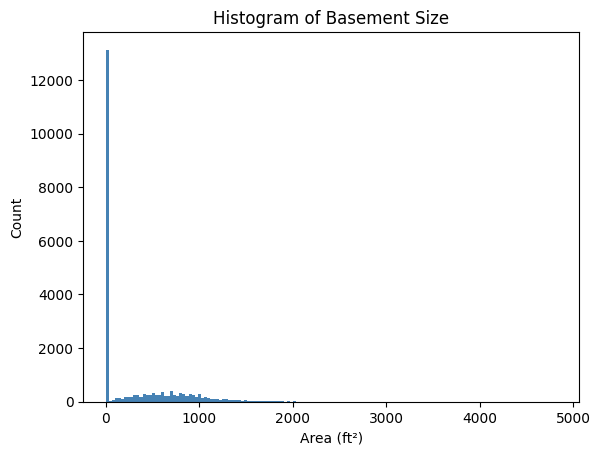

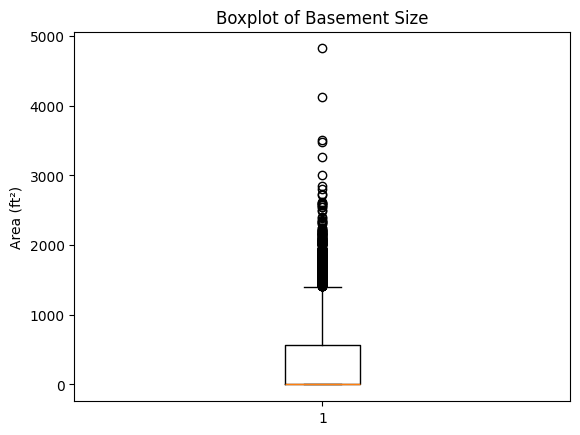

In [74]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_basement'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Basement Size')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_basement'])
plt.title ('Boxplot of Basement Size')
plt.ylabel('Area (ft\u00b2)')
plt.show()

In [75]:
# year built
# Dates are not technically a continuous dataset, therefore, it does not make sense to calculate the mean.

print("median year built =", df['yr_built'].median())
print("mode year built = ", df['yr_built'].mode())

median year built = 1975.0
mode year built =  0    2014
Name: yr_built, dtype: int64


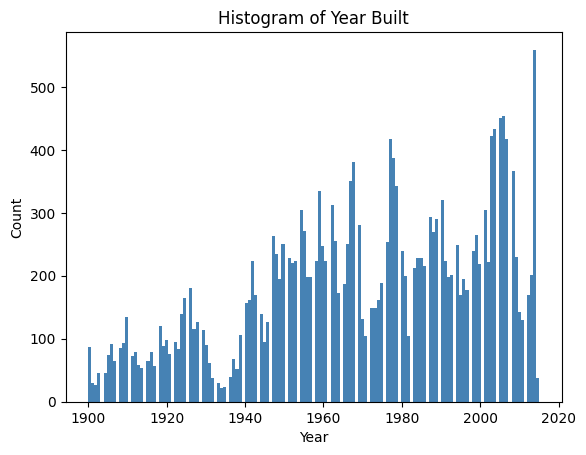

In [76]:
# Plotting a histogram to look at the spread of the data.

fig = plt.figure()
plt.hist(df['yr_built'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Year Built')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [77]:
# year renovated
# Dates are not technically a continuous dataset, therefore, it does not make sense to calculate the mean.

print("median year renovated =", df['yr_renovated'].median())
print("mode year renovated = ", df['yr_renovated'].mode())

median year renovated = 0.0
mode year renovated =  0    0
Name: yr_renovated, dtype: int64


In [89]:
# Creating a list of years that the houses were renovated.

reno_yr = np.sort(df['yr_renovated'].unique())
print(reno_yr)

reno_yr_count = df['yr_renovated'].value_counts().sort_index()
print(reno_yr_count)

[   0 1934 1940 1944 1945 1946 1948 1950 1951 1953 1954 1955 1956 1957
 1958 1959 1960 1962 1963 1964 1965 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
yr_renovated
0       20699
1934        1
1940        2
1944        1
1945        3
        ...  
2011       13
2012       11
2013       37
2014       91
2015       16
Name: count, Length: 70, dtype: int64


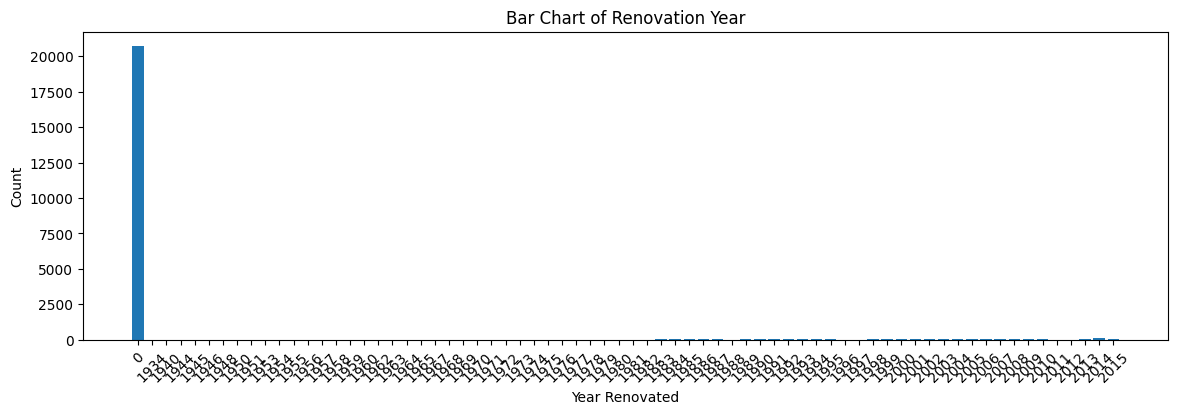

In [97]:
# Plotting a bar chart to look at the frequency of houses renovated.

reno_yr_string = reno_yr.astype(str)

plt.figure(figsize=(14,4))
plt.bar(reno_yr_string, reno_yr_count.values)
plt.xlabel("Year Renovated")
plt.ylabel("Count")
plt.title("Bar Chart of Renovation Year")
plt.xticks(rotation = 45)
plt.show()

In [99]:
# zipcode
# Zipcodes are not a continuous dataset, therefore, it does not make sense to calculate the mean.

print("zipcode median =", df['zipcode'].median())
print("zipcode mode = ", df['zipcode'].mode())
print("zipcode range =", df['zipcode'].max() - df['zipcode'].min())

zipcode median = 98065.0
zipcode mode =  0    98103
Name: zipcode, dtype: int64
zipcode range = 198


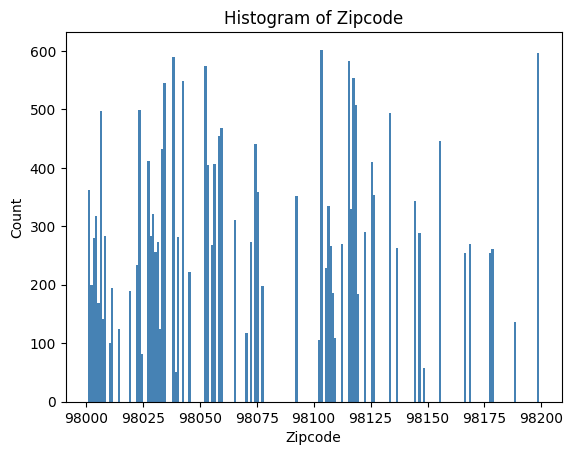

In [100]:
# Plotting a histogram to look at the spread of the data.
# The zipcode range is 198, therefore 198 bins are used in the histogram.

fig = plt.figure()
plt.hist(df['zipcode'], bins=198, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Count')
plt.show()

In [101]:
# lat

print("mean latitude =", df['lat'].mean().round(1))
print("median latitude =", df['lat'].median())
print("mode latitude =", df['lat'].mode())

mean latitude = 47.6
median latitude = 47.5718
mode latitude = 0    47.5322
1    47.5491
2    47.6624
3    47.6846
Name: lat, dtype: float64


In [102]:
# The previous result suggests that there are four modes: 47.5322, 47.5491, 47.6624, and 47.6846, so I want to count the number of rows with those prices.

lat_mode_1 = df['lat'] == 47.5322
print("lat_mode_1 =", lat_mode_1.sum())

lat_mode_2 = df['lat'] == 47.5491
print("lat_mode_2 =", lat_mode_2.sum())

lat_mode_3 = df['lat'] == 47.6624
print("lat_mode_3 =", lat_mode_3.sum())

lat_mode_4 = df['lat'] == 47.6846
print("lat_mode_4 =", lat_mode_4.sum())

lat_mode_1 = 17
lat_mode_2 = 17
lat_mode_3 = 17
lat_mode_4 = 17


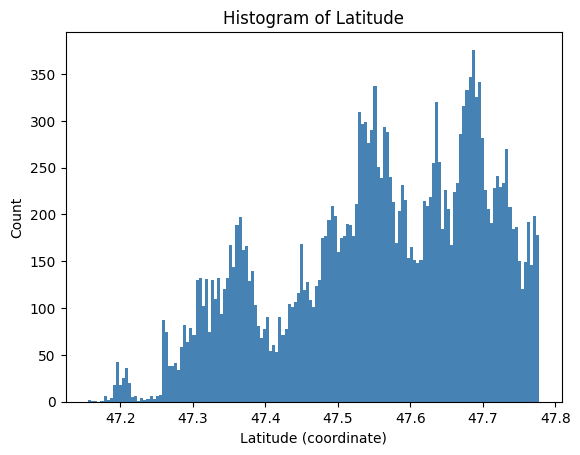

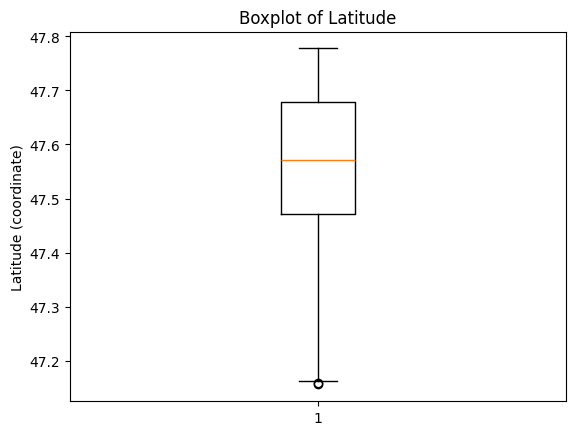

In [103]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['lat'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Latitude')
plt.xlabel('Latitude (coordinate)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['lat'])
plt.title ('Boxplot of Latitude')
plt.ylabel('Latitude (coordinate)')
plt.show()

In [104]:
# lat

print("mean longitude =", df['long'].mean().round(1))
print("median longitude =", df['long'].median())
print("mode longitude =", df['long'].mode())

mean longitude = -122.2
median longitude = -122.23
mode longitude = 0   -122.29
Name: long, dtype: float64


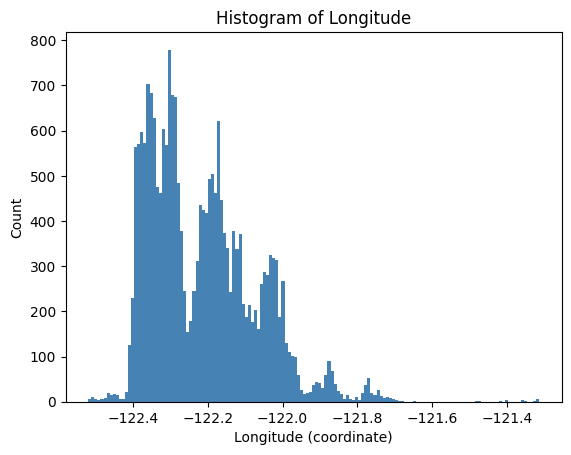

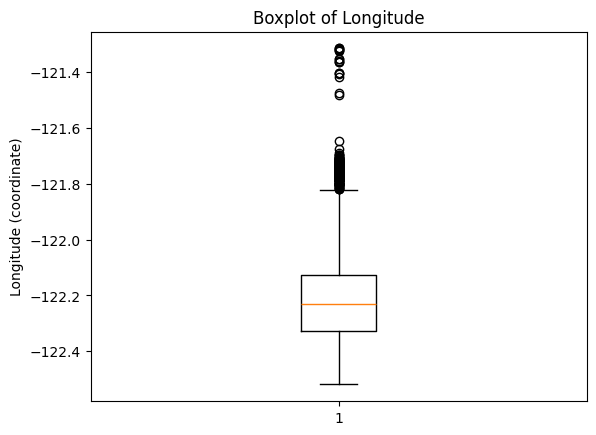

In [105]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['long'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Longitude')
plt.xlabel('Longitude (coordinate)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['long'])
plt.title ('Boxplot of Longitude')
plt.ylabel('Longitude (coordinate)')
plt.show()

In [106]:
# sqft_living15

print("mean sqft_living15 =", df['sqft_living15'].mean().round(1), "ft\u00b2")
print("median sqft_living15 =", df['sqft_living15'].median(), "ft\u00b2")
print("mode sqft_living15 =", df['sqft_living15'].mode(), "ft\u00b2")

mean sqft_living15 = 1986.6 ft²
median sqft_living15 = 1840.0 ft²
mode sqft_living15 = 0    1540
Name: sqft_living15, dtype: int64 ft²


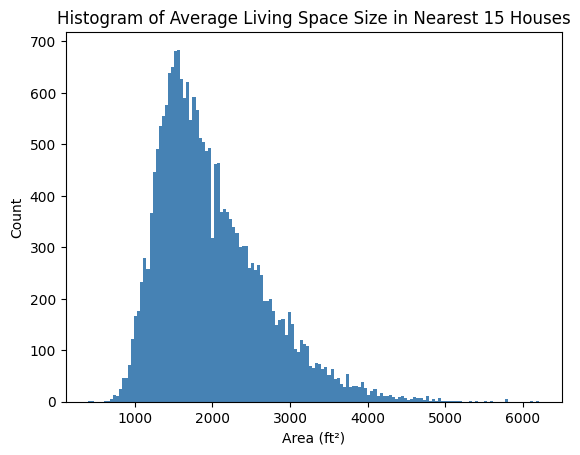

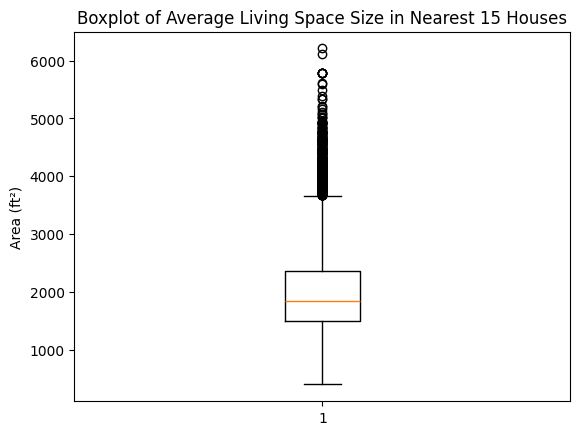

In [107]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_living15'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Average Living Space Size in Nearest 15 Houses')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_living15'])
plt.title ('Boxplot of Average Living Space Size in Nearest 15 Houses')
plt.ylabel('Area (ft\u00b2)')
plt.show()

In [108]:
# sqft_lot15

print("mean sqft_lot15 =", df['sqft_lot15'].mean().round(1), "ft\u00b2")
print("median sqft_lot15 =", df['sqft_lot15'].median(), "ft\u00b2")
print("mode sqft_lot15 =", df['sqft_lot15'].mode(), "ft\u00b2")

mean sqft_lot15 = 12768.5 ft²
median sqft_lot15 = 7620.0 ft²
mode sqft_lot15 = 0    5000
Name: sqft_lot15, dtype: int64 ft²


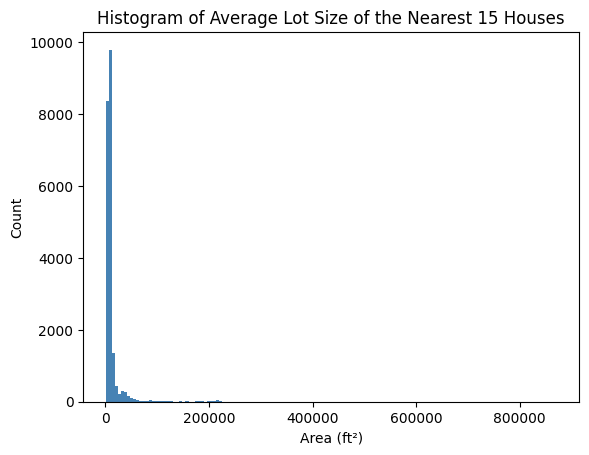

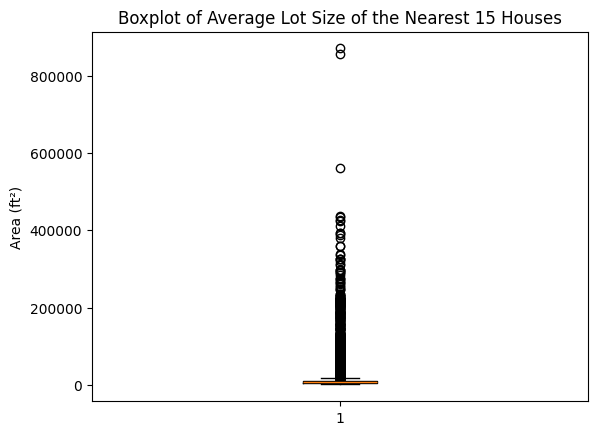

In [109]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_lot15'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Average Lot Size of the Nearest 15 Houses')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_lot15'])
plt.title ('Boxplot of Average Lot Size of the Nearest 15 Houses')
plt.ylabel('Area (ft\u00b2)')
plt.show()

**2.3 Diagnose for correlations between variables and determine independent and dependent variables.**

In [110]:
pd.set_option('display.max_columns', None)

corr_matrix = df.corr()
corr_matrix

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.005919,0.002101,-0.010065,-0.130346,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.013376,-0.033640,-0.031534,0.005470,-0.022491,0.001356,-0.001800,-0.050769,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.309783,0.515365,0.685204,0.086774,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.005919,-0.013376,0.309783,1.000000,0.500483,0.586323,0.028374,0.177992,-0.005037,0.082295,0.025030,0.358322,0.479064,0.298110,0.155478,0.020089,-0.154092,-0.010543,0.131066,0.392331,0.025166
bathrooms,0.002101,-0.033640,0.515365,0.500483,1.000000,0.721557,0.083588,0.487859,0.067113,0.181425,-0.123002,0.648745,0.667757,0.276989,0.495315,0.048536,-0.200677,0.026612,0.218557,0.554516,0.086509
sqft_living,-0.010065,-0.031534,0.685204,0.586323,0.721557,1.000000,0.158696,0.347018,0.104444,0.276309,-0.056720,0.748173,0.857824,0.424896,0.312702,0.054754,-0.196213,0.049158,0.235566,0.742589,0.172754
sqft_lot,-0.130346,0.005470,0.086774,0.028374,0.083588,0.158696,1.000000,-0.005909,0.021220,0.073528,-0.008806,0.109662,0.177923,0.015107,0.051678,0.008186,-0.129275,-0.085237,0.225808,0.143467,0.719021
floors,0.018525,-0.022491,0.256794,0.177992,0.487859,0.347018,-0.005909,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001356,0.266369,-0.005037,0.067113,0.104444,0.021220,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.082295,0.181425,0.276309,0.073528,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


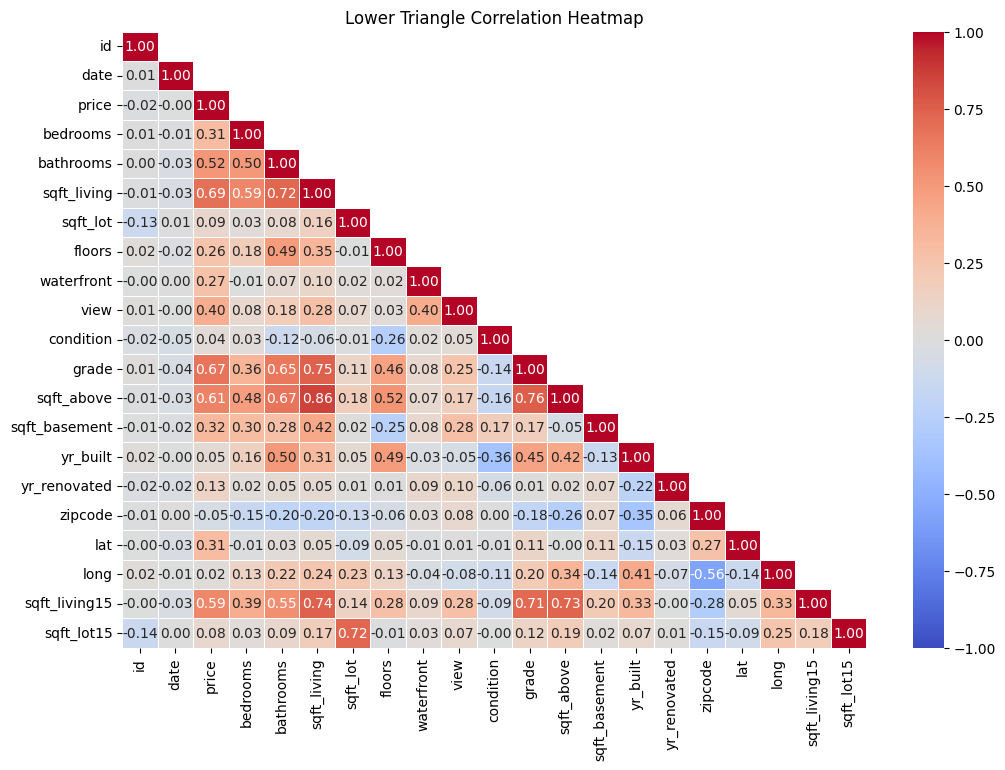

In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create upper triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot heatmap with masked lower triangle
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    mask=mask,          # mask the lower triangle
    annot=True,          # show values
    fmt=".2f",           # number format
    cmap="coolwarm", 
    vmin=-1, vmax=1, 
    linewidths=0.5
)

plt.title("Lower Triangle Correlation Heatmap")
plt.show()


I used ChatGPT to help me figure out how to print the correlation table and color the cells using a heatmap. I was able to create an incomplete correlation table, see above (because it included the 1.0 and duplicate values), but that was not conducive to reporting the values.
Therefore, I asked ChatGPT to help me to generate a refined correlation table with a color scale to identify strong correlations.

Chatgpt. (n.d.). ChatGPT. Retrieved November 24, 2025, from https://chatgpt.com/

In [112]:
# The correlation table above contains variables that exhibit weak correlations.
# I will filter out variables with weak correlation values (< |0.5|) and the self-correlation values.
# I will return the variables with moderate to strong correlation values (>= |0.50|).

high_corr = ((corr_matrix.abs() > 0.49) & (corr_matrix.abs() < 1))
high_corr.columns[high_corr.any()]

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'yr_built', 'zipcode', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [113]:
# A reduced correlation matrix will be used to visualize the moderate to strong correlations only.

corr_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'long', 'sqft_living15', 'sqft_lot15']

corr_matrix_red = df[corr_col].corr()
corr_matrix_red

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,zipcode,long,sqft_living15,sqft_lot15
price,1.000000,0.309783,0.515365,0.685204,0.086774,0.256794,0.667434,0.605567,0.054012,-0.053203,0.021626,0.585379,0.082447
bedrooms,0.309783,1.000000,0.500483,0.586323,0.028374,0.177992,0.358322,0.479064,0.155478,-0.154092,0.131066,0.392331,0.025166
bathrooms,0.515365,0.500483,1.000000,0.721557,0.083588,0.487859,0.648745,0.667757,0.495315,-0.200677,0.218557,0.554516,0.086509
sqft_living,0.685204,0.586323,0.721557,1.000000,0.158696,0.347018,0.748173,0.857824,0.312702,-0.196213,0.235566,0.742589,0.172754
sqft_lot,0.086774,0.028374,0.083588,0.158696,1.000000,-0.005909,0.109662,0.177923,0.051678,-0.129275,0.225808,0.143467,0.719021
floors,0.256794,0.177992,0.487859,0.347018,-0.005909,1.000000,0.458183,0.523885,0.489319,-0.059121,0.125419,0.279885,-0.011269
grade,0.667434,0.358322,0.648745,0.748173,0.109662,0.458183,1.000000,0.755923,0.446963,-0.184862,0.198372,0.713202,0.119248
sqft_above,0.605567,0.479064,0.667757,0.857824,0.177923,0.523885,0.755923,1.000000,0.423898,-0.261190,0.343803,0.731870,0.194050
yr_built,0.054012,0.155478,0.495315,0.312702,0.051678,0.489319,0.446963,0.423898,1.000000,-0.346869,0.409356,0.326229,0.070958
zipcode,-0.053203,-0.154092,-0.200677,-0.196213,-0.129275,-0.059121,-0.184862,-0.261190,-0.346869,1.000000,-0.564072,-0.279033,-0.147221


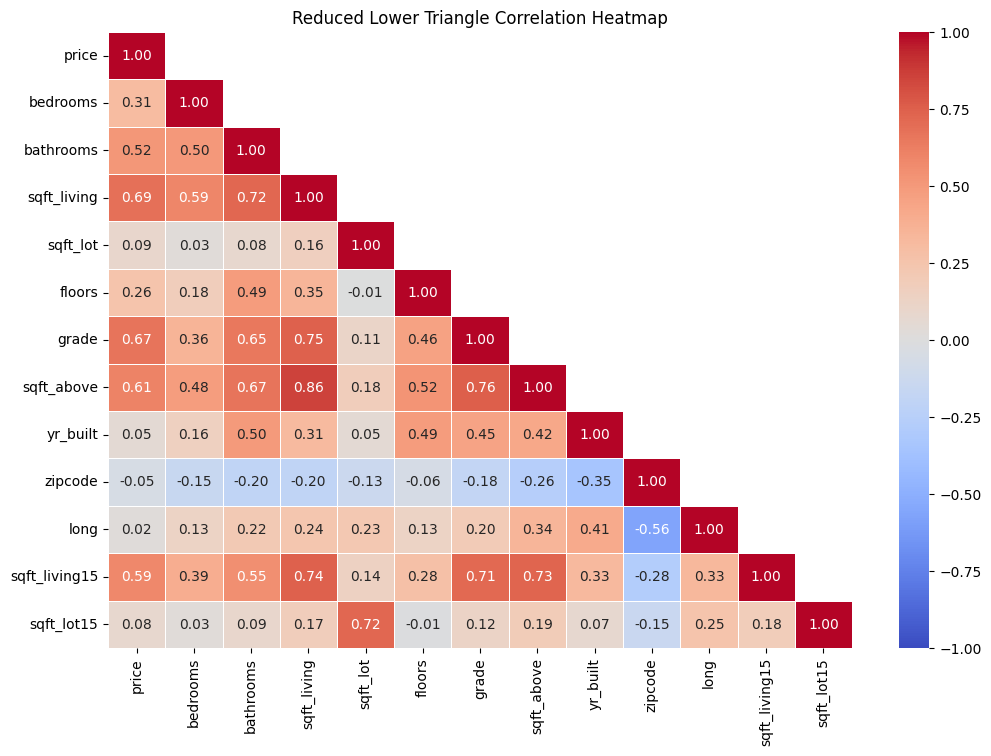

In [114]:
# Create upper triangle mask
mask1 = np.triu(np.ones_like(corr_matrix_red, dtype=bool), k=1)

# Plot heatmap with masked lower triangle
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix_red, 
    mask=mask1,          # mask the lower triangle
    annot=True,          # show values
    fmt=".2f",           # number format
    cmap="coolwarm", 
    vmin=-1, vmax=1, 
    linewidths=0.5
)

plt.title("Reduced Lower Triangle Correlation Heatmap")
plt.show()

Of the 13 variables with moderate to strong correlation values, **price** appears to be a dependent variable with moderately positive correlations with independent variables such as living area size (0.69), grade (0.67), area above (0.61), and the average living area of 15 nearby houses (0.59).

The **living area size**, a potential dependent variable, has strong correlations with likely independent variables such as the area above (0.86), grade (0.75), average living area of 15 nearby houses (0.74), and number of bathrooms (0.72).

The **area of the lot**, a dependent variable, has a strong positive correlation with the average lot areas of 15 nearby houses (0.72), a potential predictor.

The **average living area of 15 nearby houses**, an unlikely dependent variable, has strong positive correlations with the grade of the house (0.71), area above (0.73), and living area (0.74).

These relationships will be explored.

slope = 279.73
intercept = -39568.0


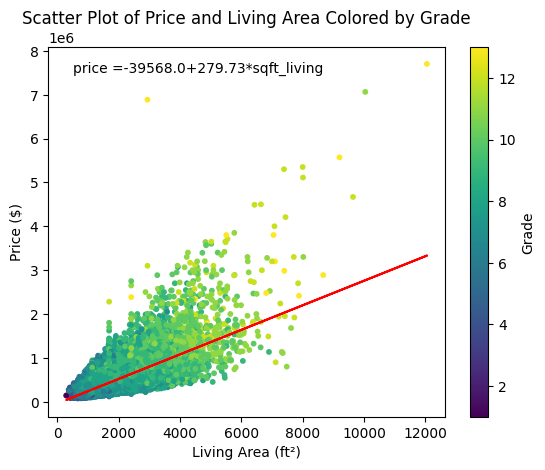

In [115]:
# price vs. sqft_living (and grade)

fig = plt.figure()
plt.scatter(df['sqft_living'], df['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_living'], df['price'], 1)
line = slope * df['sqft_living'] + intercept
plt.plot(df['sqft_living'], line, color = 'red')
plt.text(500, 7500000, ("price =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_living"))

print("slope =", str(round(slope, 2)))
print("intercept =", str(round(intercept, 2)))

plt.title ('Scatter Plot of Price and Living Area Colored by Grade')
plt.xlabel('Living Area (ft\u00b2)')
plt.ylabel('Price ($)')
plt.show()

The Bobbit (2020) webpage was used to help me find the code to create a scatter plot with a color scheme from a third column. In this case, I plotted living area on the x-axis and price on the y-axis while color-coding the data points by grade of the house. (Grade was selected for color coding because it is a categorical dataset.) The color coding itself was very useful, however I still required a reference to the magnitudes described by the color. As such, I sought a color bar to provide a scale for the grade of each house. This is when I turned to GeeksforGeeks (2020). I used a single line of code in their example to build the color bar on the existing scatter plot. Lastly, I wanted to fit a trendline to the scatter plot data to visualize the relationship described in the correlation table. Therefore, I referenced the code written in GeeksforGeeks (2024) to create a best fit line.

Bobbitt, Z. (2020, September 3). Matplotlib: How to color a scatterplot by value. Statology. https://www.statology.org/matplotlib-scatterplot-color-by-value/

How to draw a line inside a scatter plot. (2024, July 22). GeeksforGeeks. https://www.geeksforgeeks.org/data-visualization/how-to-draw-a-line-inside-a-scatter-plot/

Matplotlib.pyplot.colorbar() function in Python. (2020, December 5). GeeksforGeeks. https://www.geeksforgeeks.org/python/matplotlib-pyplot-colorbar-function-in-python/

In [116]:
import pandas as pd
from scipy.stats import zscore

z_scaled = df.copy()

norm_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'long', 'sqft_living15', 'sqft_lot15']

z_scaled[norm_col] = zscore(z_scaled[norm_col])
print(z_scaled)

               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 -0.866717 -0.396645  -1.493191    -0.992121   
1      6414100192 2014-12-09 -0.005688 -0.396645   0.172942     0.553612   
2      5631500400 2015-02-25 -0.980849 -1.523889  -1.493191    -1.448057   
3      2487200875 2014-12-09  0.174090  0.730599   1.172623    -0.124731   
4      1954400510 2015-02-18 -0.081958 -0.396645  -0.160284    -0.436102   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21 -0.490545 -0.396645   0.506169    -0.602908   
21609  6600060120 2015-02-23 -0.381588  0.730599   0.506169     0.264482   
21610  1523300141 2014-06-23 -0.375865 -1.523889  -1.826418    -1.170047   
21611   291310100 2015-01-16 -0.381588 -0.396645   0.506169    -0.525065   
21612  1523300157 2014-10-15 -0.585882 -1.523889  -1.826418    -1.170047   

       sqft_lot    floors  waterfront  view  condition     grade  sqft_above  \
0     -

Normalizing the data opens the door to modeling. Therefore, I referenced the GeeksforGeeks (2021) webpage to standardize the graphed data by their respective z-scores. Normalizing allows for a proper comparison between two variables on a common scale, which is the deviation from the mean, which is set at zero.

How to standardize data in a pandas dataframe? (2021, December 16). GeeksforGeeks. https://www.geeksforgeeks.org/python/how-to-standardize-data-in-a-pandas-dataframe/

best fit slope = 0.69
best fit intercept = -0.0
model slope = 0.69
model intercept = -0.0
model R² = 0.47


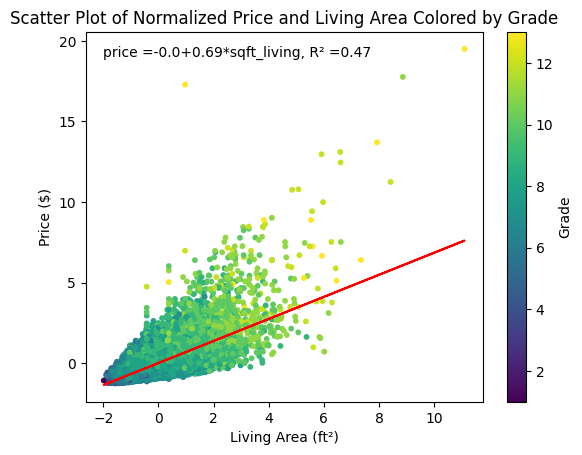

In [117]:
# price vs. sqft_living (and grade), normalized

from sklearn.linear_model import LinearRegression

fig = plt.figure()
plt.scatter(z_scaled['sqft_living'], z_scaled['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_living'], z_scaled['price'], 1)
line = slope * z_scaled['sqft_living'] + intercept
plt.plot(z_scaled['sqft_living'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_living']], z_scaled['price'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_living']], z_scaled['price'])

plt.text(-2, 19, ("price =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_living" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Price and Living Area Colored by Grade')
plt.xlabel('Living Area (ft\u00b2)')
plt.ylabel('Price ($)')
plt.show()

After graphing the normalized data, I wanted to return the R-squared value of the best fit line, and verify that the best fit line matches with the actual linear regression. I referenced the Bobbit (2022) webpage to obatin that data.

Bobbitt, Z. (2022, March 24). How to calculate r-squared in python(With example). Statology. https://www.statology.org/r-squared-in-python/

best fit slope = 208457.56
best fit intercept = -1056044.98


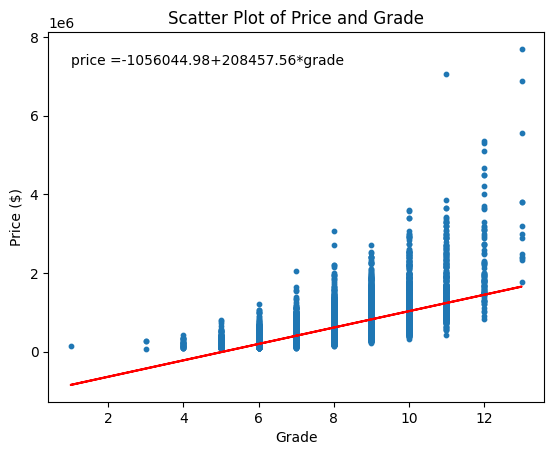

In [118]:
# price vs. grade

fig = plt.figure()
plt.scatter(df['grade'], df['price'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(df['grade'], df['price'], 1)
line = slope * df['grade'] + intercept
plt.plot(df['grade'], line, color = 'red')
plt.text(1, 7300000, ("price =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*grade"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))

plt.title ('Scatter Plot of Price and Grade')
plt.xlabel('Grade')
plt.ylabel('Price ($)')
plt.show()

best fit slope = 0.67
best fit intercept = -0.0
model slope = 0.67
model intercept = -0.0
model R² = 0.45


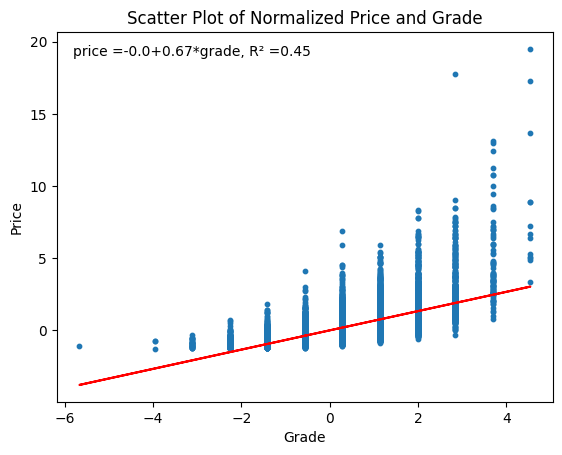

In [119]:
# price vs. grade, normalized

fig = plt.figure()
plt.scatter(z_scaled['grade'], z_scaled['price'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['grade'], z_scaled['price'], 1)
line = slope * z_scaled['grade'] + intercept
plt.plot(z_scaled['grade'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['grade']], z_scaled['price'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['grade']], z_scaled['price'])

plt.text(-5.8, 19, ("price =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*grade" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Price and Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

best fit slope = 268.47
best fit intercept = 59953.19


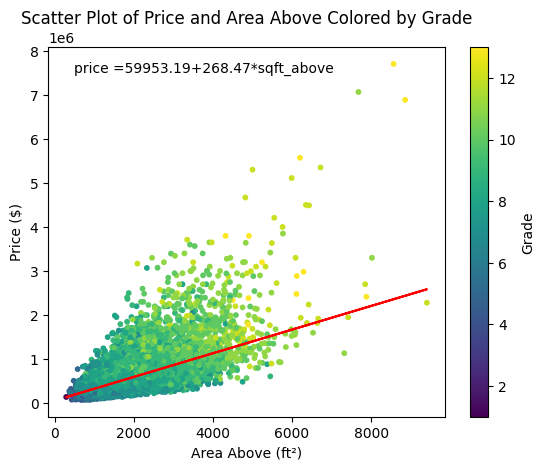

In [148]:
# price vs. sqft_above (and grade)

fig = plt.figure()
plt.scatter(df['sqft_above'], df['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_above'], df['price'], 1)
line = slope * df['sqft_above'] + intercept
plt.plot(df['sqft_above'], line, color = 'red')
plt.text(500, 7500000, ("price =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_above"))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

plt.title ('Scatter Plot of Price and Area Above Colored by Grade')
plt.xlabel('Area Above (ft\u00b2)')
plt.ylabel('Price ($)')
plt.show()

best fit slope = 0.61
best fit intercept = -0.0
model slope = 0.61
model intercept = -0.0
model R² = 0.37


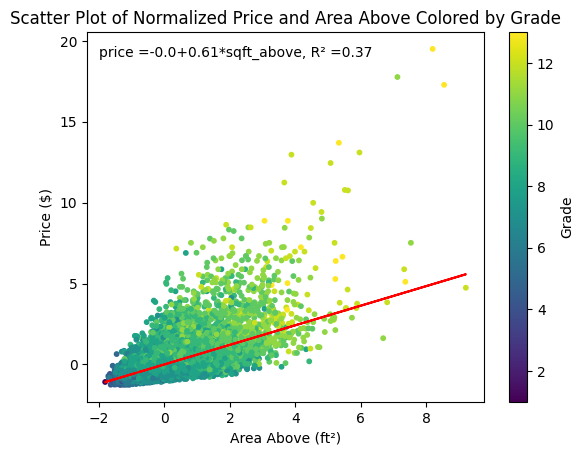

In [121]:
# price vs. sqft_above (and grade), normalized

fig = plt.figure()
plt.scatter(z_scaled['sqft_above'], z_scaled['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_above'], z_scaled['price'], 1)
line = slope * z_scaled['sqft_above'] + intercept
plt.plot(z_scaled['sqft_above'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_above']], z_scaled['price'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_above']], z_scaled['price'])

plt.text(-2, 19, ("price =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_above" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Price and Area Above Colored by Grade')
plt.xlabel('Area Above (ft\u00b2)')
plt.ylabel('Price ($)')
plt.show()

best fit slope = 313.56
best fit intercept = -82807.2


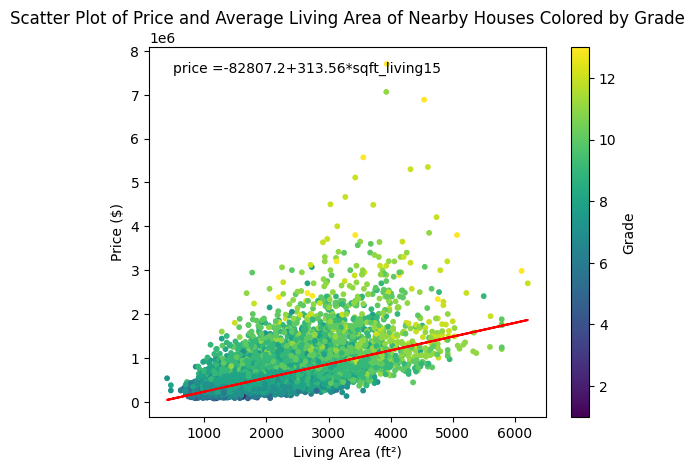

In [122]:
# price vs. sqft_living15

fig = plt.figure()
plt.scatter(df['sqft_living15'], df['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_living15'], df['price'], 1)
line = slope * df['sqft_living15'] + intercept
plt.plot(df['sqft_living15'], line, color = 'red')
plt.text(500, 7500000, ("price =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_living15"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))

plt.title ('Scatter Plot of Price and Average Living Area of Nearby Houses Colored by Grade')
plt.xlabel('Living Area (ft\u00b2)')
plt.ylabel('Price ($)')
plt.show()

best fit slope = 0.59
best fit intercept = -0.0
model slope = 0.59
model intercept = -0.0
model R² = 0.34


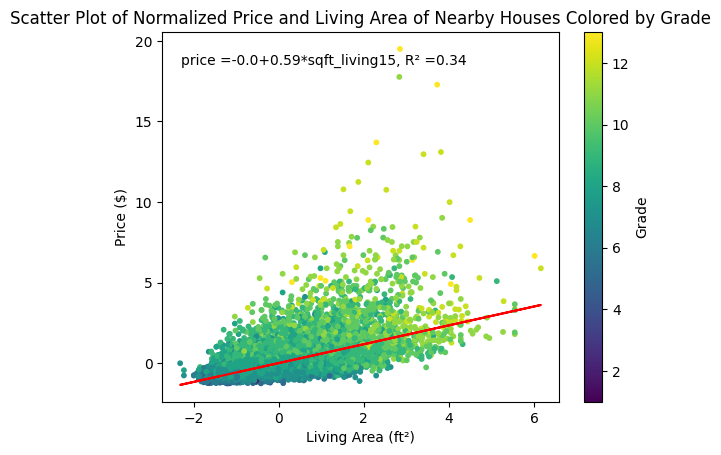

In [123]:
# price vs. sqft_living15, normalized

fig = plt.figure()
plt.scatter(z_scaled['sqft_living15'], z_scaled['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_living15'], z_scaled['price'], 1)
line = slope * z_scaled['sqft_living15'] + intercept
plt.plot(z_scaled['sqft_living15'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_living15']], z_scaled['price'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_living15']], z_scaled['price'])

plt.text(-2.3, 18.5, ("price =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_living15" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Price and Living Area of Nearby Houses Colored by Grade')
plt.xlabel('Living Area (ft\u00b2)')
plt.ylabel('Price ($)')
plt.show()

To varying yet moderate degrees, the house prices are influenced by the area above, grade, average living area of the 15 nearby houses, and number of bathrooms. These, among other factors, would predictably play a role in the overall price of a house. However, the factors not included did not exhibit, at minimum, correlation values of 0.59 or greater. All of the variables graphed on the x-axis exhibited a positive relationship with price. Ultimately, the R-squared values did not exceed 0.7, which means that no single independent variable could reliably explain the variation in house prices.

best fit slope = 0.93
best fit intercept = 406.17


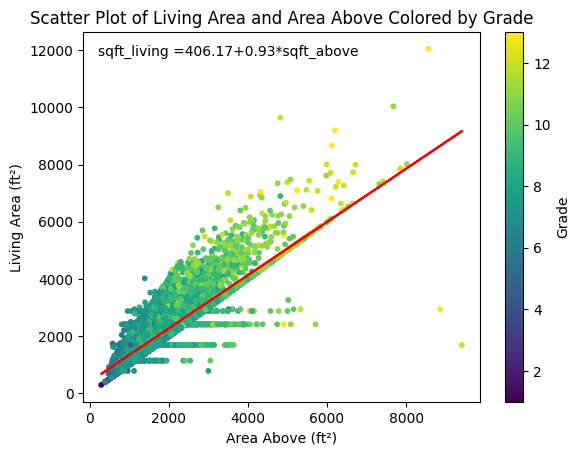

In [124]:
# living area vs. area above

fig = plt.figure()
plt.scatter(df['sqft_above'], df['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_above'], df['sqft_living'], 1)
line = slope * df['sqft_above'] + intercept
plt.plot(df['sqft_above'], line, color = 'red')
plt.text(200, 11800, ("sqft_living =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_above"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))

plt.title ('Scatter Plot of Living Area and Area Above Colored by Grade')
plt.xlabel('Area Above (ft\u00b2)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 0.86
best fit intercept = -0.0
model slope = 0.86
model intercept = -0.0
model R² = 0.74


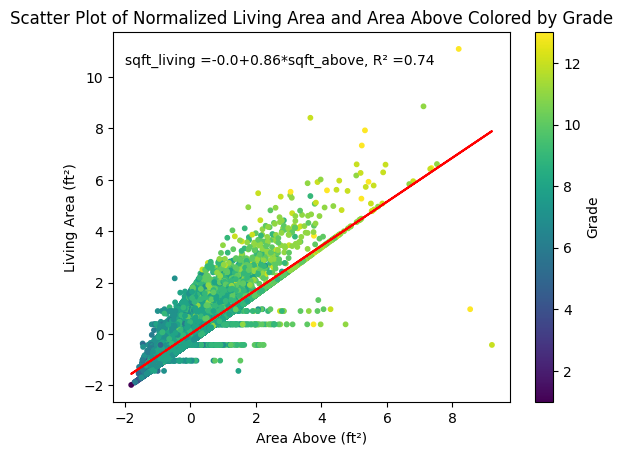

In [125]:
# sqft_living vs. sqft_above, normalized

fig = plt.figure()
plt.scatter(z_scaled['sqft_above'], z_scaled['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_above'], z_scaled['sqft_living'], 1)
line = slope * z_scaled['sqft_above'] + intercept
plt.plot(z_scaled['sqft_above'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_above']], z_scaled['sqft_living'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_above']], z_scaled['sqft_living'])

plt.text(-2, 10.5, ("sqft_living =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_above" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Living Area and Area Above Colored by Grade')
plt.xlabel('Area Above (ft\u00b2)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 572.38
best fit intercept = -2310.48


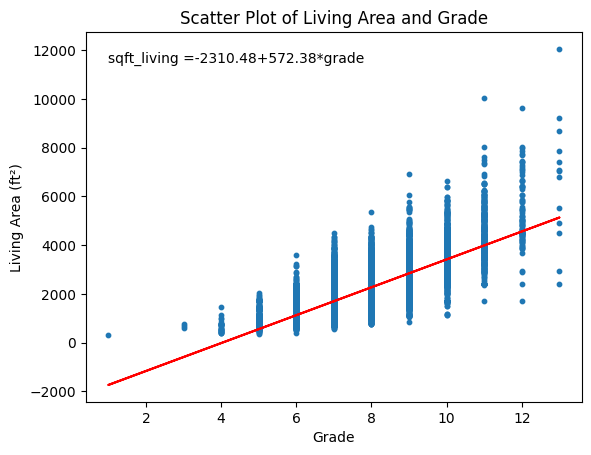

In [146]:
# sqft_living vs. grade

fig = plt.figure()
plt.scatter(df['grade'], df['sqft_living'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(df['grade'], df['sqft_living'], 1)
line = slope * df['grade'] + intercept
plt.plot(df['grade'], line, color = 'red')
plt.text(1, 11500, ("sqft_living =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*grade"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))

plt.title ('Scatter Plot of Living Area and Grade')
plt.xlabel('Grade')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 0.75
best fit intercept = -0.0
model slope = 0.75
model intercept = -0.0
model R² = 0.56


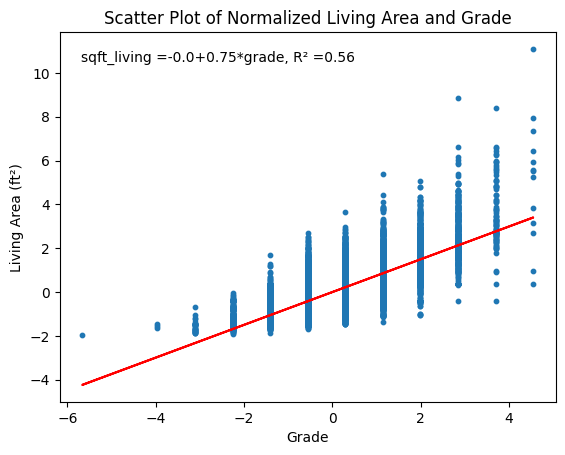

In [145]:
# sqft_living vs. grade, normalized

fig = plt.figure()
plt.scatter(z_scaled['grade'], z_scaled['sqft_living'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['grade'], z_scaled['sqft_living'], 1)
line = slope * z_scaled['grade'] + intercept
plt.plot(z_scaled['grade'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['grade']], z_scaled['sqft_living'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['grade']], z_scaled['sqft_living'])

plt.text(-5.7, 10.5, ("sqft_living =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*grade" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Living Area and Grade')
plt.xlabel('Grade')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 0.97
best fit intercept = 136.63


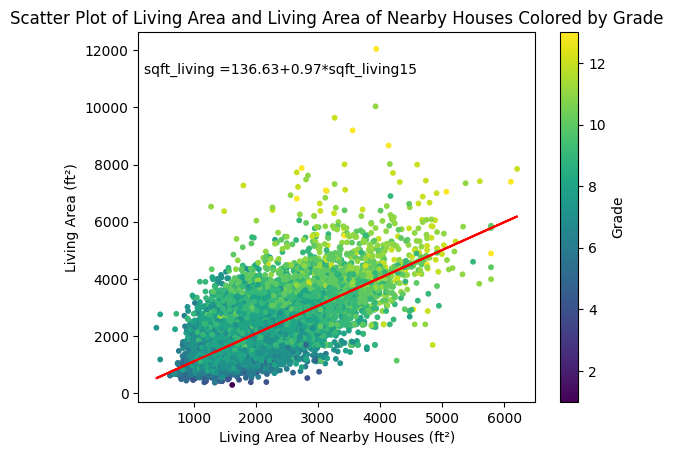

In [128]:
# sqft_living vs. sqft_living15

fig = plt.figure()
plt.scatter(df['sqft_living15'], df['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_living15'], df['sqft_living'], 1)
line = slope * df['sqft_living15'] + intercept
plt.plot(df['sqft_living15'], line, color = 'red')
plt.text(200, 11200, ("sqft_living =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_living15"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))

plt.title ('Scatter Plot of Living Area and Living Area of Nearby Houses Colored by Grade')
plt.xlabel('Living Area of Nearby Houses (ft\u00b2)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 0.74
best fit intercept = -0.0
model slope = 0.74
model intercept = -0.0
model R² = 0.55


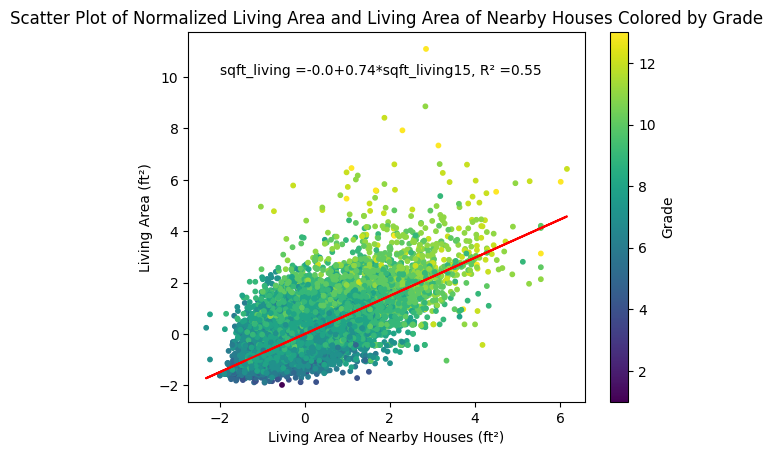

In [129]:
# sqft_living vs. sqft_living15, normalized

fig = plt.figure()
plt.scatter(z_scaled['sqft_living15'], z_scaled['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_living15'], z_scaled['sqft_living'], 1)
line = slope * z_scaled['sqft_living15'] + intercept
plt.plot(z_scaled['sqft_living15'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_living15']], z_scaled['sqft_living'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_living15']], z_scaled['sqft_living'])

plt.text(-2, 10.1, ("sqft_living =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_living15" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Living Area and Living Area of Nearby Houses Colored by Grade')
plt.xlabel('Living Area of Nearby Houses (ft\u00b2)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 864.87
best fit intercept = 238.42


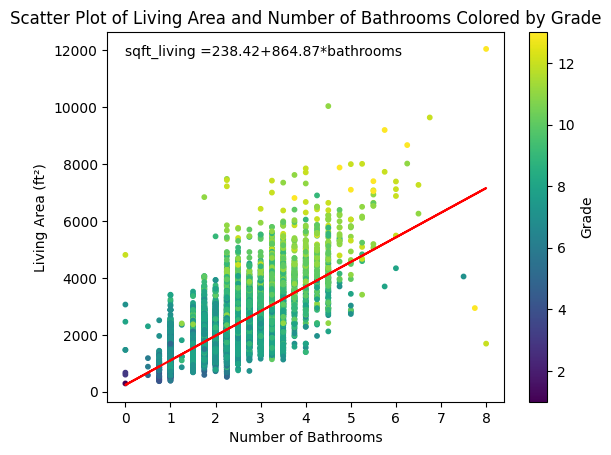

In [130]:
# sqft_living vs. bathrooms

fig = plt.figure()
plt.scatter(df['bathrooms'], df['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['bathrooms'], df['sqft_living'], 1)
line = slope * df['bathrooms'] + intercept
plt.plot(df['bathrooms'], line, color = 'red')
plt.text(0, 11800, ("sqft_living =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*bathrooms"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))

plt.title ('Scatter Plot of Living Area and Number of Bathrooms Colored by Grade')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 0.72
best fit intercept = 0.0
model slope = 0.72
model intercept = 0.0
model R² = 0.52


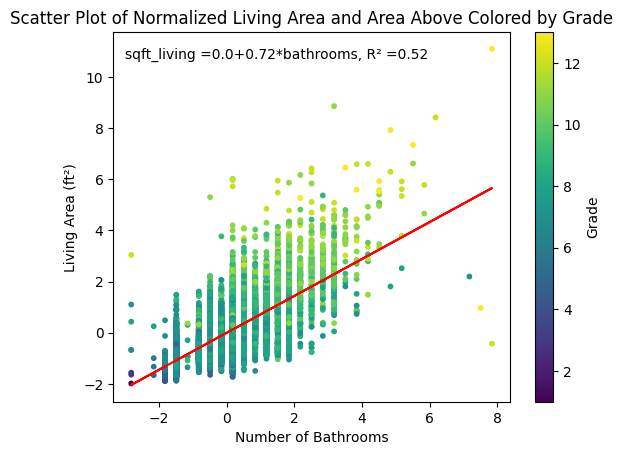

In [131]:
# sqft_living vs. bathrooms, normalized

fig = plt.figure()
plt.scatter(z_scaled['bathrooms'], z_scaled['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['bathrooms'], z_scaled['sqft_living'], 1)
line = slope * z_scaled['bathrooms'] + intercept
plt.plot(z_scaled['bathrooms'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['bathrooms']], z_scaled['sqft_living'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['bathrooms']], z_scaled['sqft_living'])

plt.text(-3, 10.7, ("sqft_living =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*bathrooms" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Living Area and Area Above Colored by Grade')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

To varying yet strong degrees, the living area is influenced by the area above, grade, average living area of 15 nearby houses, and the number of bathrooms. These, among other factors, would predictably play a role in the overall living area of a house. However, the factors not included did not exhibit, at minimum, correlation values of 0.7 or greater. Understandably, all of the variables graphed on the x-axis exhibited a positive relationship with living area. Ultimately, the R-squared values did not exceed 0.7, which means that no single independent variable could reliably explain the variation in living area.

best fit slope = 1.07
best fit intercept = 1232.06


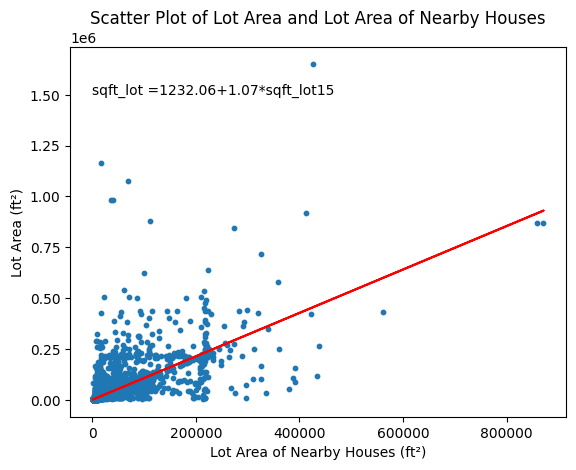

In [132]:
# sqft_lot vs. sqft_lot15

fig = plt.figure()
plt.scatter(df['sqft_lot15'], df['sqft_lot'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_lot15'], df['sqft_lot'], 1)
line = slope * df['sqft_lot15'] + intercept
plt.plot(df['sqft_lot15'], line, color = 'red')
plt.text(0, 1500000, ("sqft_lot =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_lot15"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))

plt.title ('Scatter Plot of Lot Area and Lot Area of Nearby Houses')
plt.xlabel('Lot Area of Nearby Houses (ft\u00b2)')
plt.ylabel('Lot Area (ft\u00b2)')
plt.show()

best fit slope = 0.72
best fit intercept = -0.0
model slope = 0.72
model intercept = -0.0
model R² = 0.52


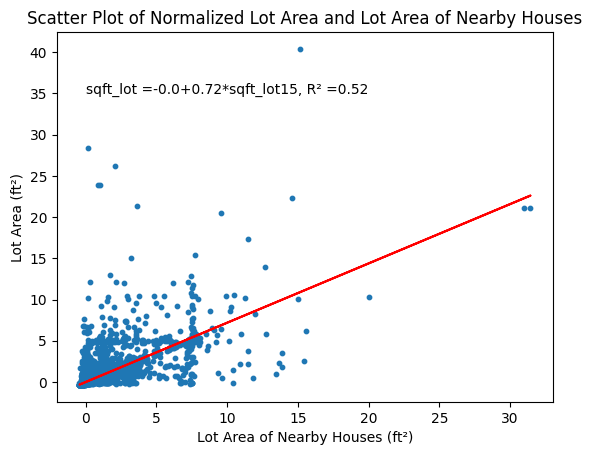

In [133]:
# sqft_lot vs. sqft_lot15, normalized

fig = plt.figure()
plt.scatter(z_scaled['sqft_lot15'], z_scaled['sqft_lot'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_lot15'], z_scaled['sqft_lot'], 1)
line = slope * z_scaled['sqft_lot15'] + intercept
plt.plot(z_scaled['sqft_lot15'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_lot15']], z_scaled['sqft_lot'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_lot15']], z_scaled['sqft_lot'])

plt.text(0, 35, ("sqft_lot =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_lot15" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Lot Area and Lot Area of Nearby Houses')
plt.xlabel('Lot Area of Nearby Houses (ft\u00b2)')
plt.ylabel('Lot Area (ft\u00b2)')
plt.show()

The slope of the scatter plots help to confirm the strong positive correlation value between lot area and the lot areas of 15 nearby houses. Ultimately, the R-squared value did not exceed 0.7, which means that lot area of 15 nearby houses alone cannot reliably explain the variation in lot area.

best fit slope = 415.86
best fit intercept = -1197.61


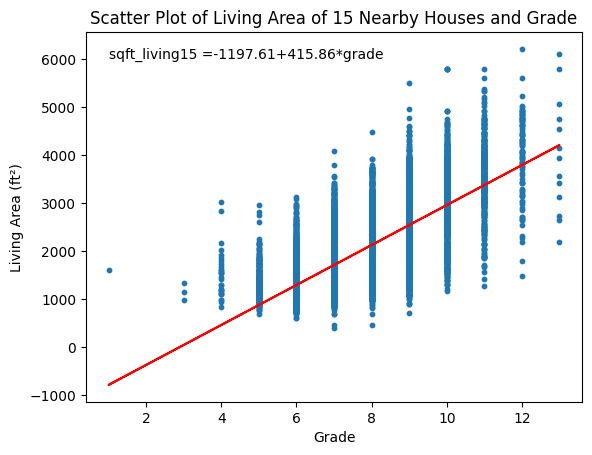

In [147]:
# sqft_living15 vs. grade

fig = plt.figure()
plt.scatter(df['grade'], df['sqft_living15'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(df['grade'], df['sqft_living15'], 1)
line = slope * df['grade'] + intercept
plt.plot(df['grade'], line, color = 'red')
plt.text(1, 6000, ("sqft_living15 =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*grade"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))

plt.title ('Scatter Plot of Living Area of 15 Nearby Houses and Grade')
plt.xlabel('Grade')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 0.71
best fit intercept = 0.0
model slope = 0.71
model intercept = -0.0
model R² = 0.51


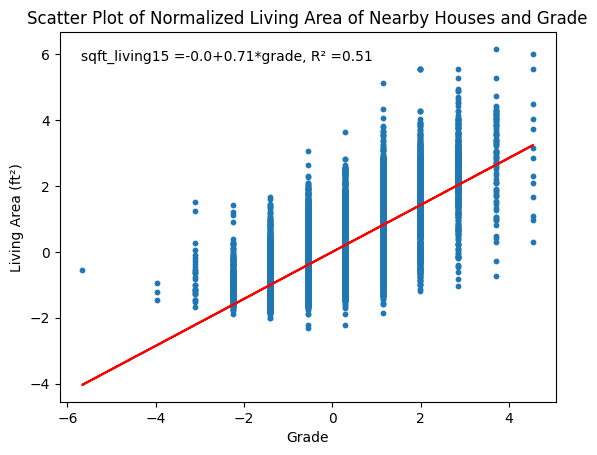

In [144]:
# sqft_living15 vs. grade, normalized

fig = plt.figure()
plt.scatter(z_scaled['grade'], z_scaled['sqft_living15'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['grade'], z_scaled['sqft_living15'], 1)
line = slope * z_scaled['grade'] + intercept
plt.plot(z_scaled['grade'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['grade']], z_scaled['sqft_living15'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['grade']], z_scaled['sqft_living15'])

plt.text(-5.7, 5.8, ("sqft_living15 =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*grade" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Living Area of Nearby Houses and Grade')
plt.xlabel('Grade')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 0.61
best fit intercept = 903.23


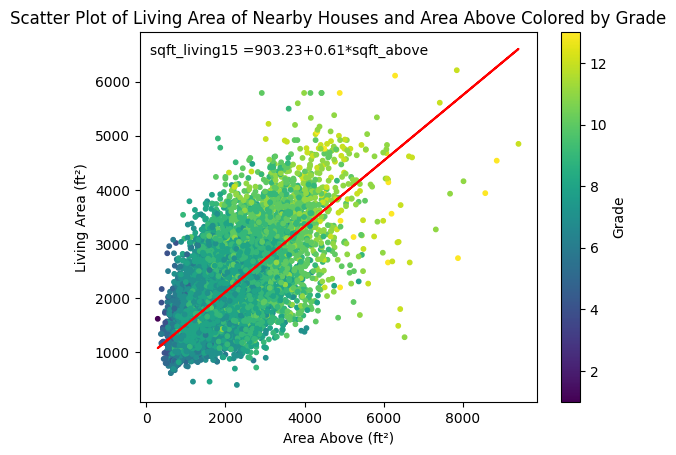

In [150]:
# living area vs. area above

fig = plt.figure()
plt.scatter(df['sqft_above'], df['sqft_living15'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_above'], df['sqft_living15'], 1)
line = slope * df['sqft_above'] + intercept
plt.plot(df['sqft_above'], line, color = 'red')
plt.text(100, 6500, ("sqft_living15 =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_above"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))

plt.title ('Scatter Plot of Living Area of Nearby Houses and Area Above Colored by Grade')
plt.xlabel('Area Above (ft\u00b2)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

best fit slope = 0.73
best fit intercept = 0.0
model slope = 0.73
model intercept = -0.0
model R² = 0.54


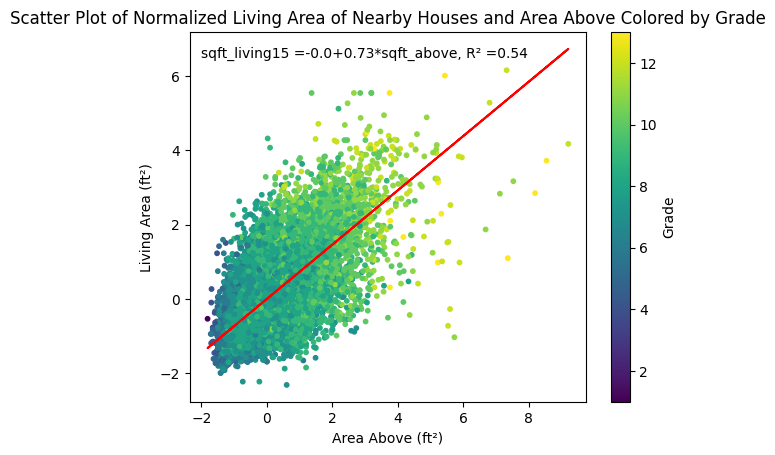

In [153]:
# sqft_living15 vs. sqft_above, normalized

fig = plt.figure()
plt.scatter(z_scaled['sqft_above'], z_scaled['sqft_living15'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_above'], z_scaled['sqft_living15'], 1)
line = slope * z_scaled['sqft_above'] + intercept
plt.plot(z_scaled['sqft_above'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_above']], z_scaled['sqft_living15'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_above']], z_scaled['sqft_living15'])

plt.text(-2, 6.5, ("sqft_living15 =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_above" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Living Area of Nearby Houses and Area Above Colored by Grade')
plt.xlabel('Area Above (ft\u00b2)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

slope = 0.57
intercept = 813.76


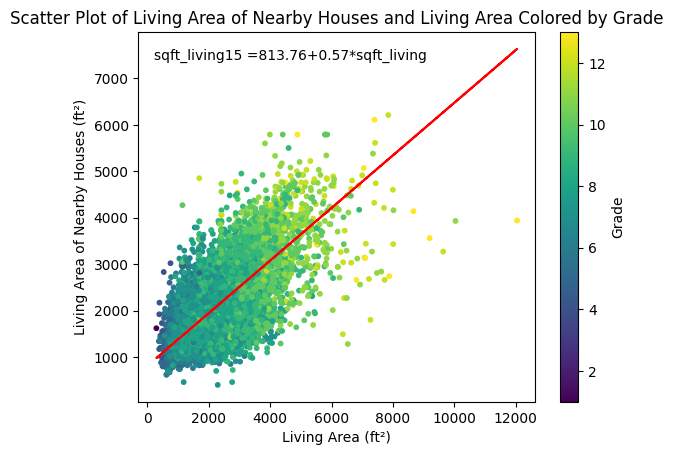

In [159]:
# sqft_living15 vs. sqft_living (and grade)

fig = plt.figure()
plt.scatter(df['sqft_living'], df['sqft_living15'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_living'], df['sqft_living15'], 1)
line = slope * df['sqft_living'] + intercept
plt.plot(df['sqft_living'], line, color = 'red')
plt.text(200, 7400, ("sqft_living15 =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_living"))

print("slope =", str(round(slope, 2)))
print("intercept =", str(round(intercept, 2)))

plt.title ('Scatter Plot of Living Area of Nearby Houses and Living Area Colored by Grade')
plt.xlabel('Living Area (ft\u00b2)')
plt.ylabel('Living Area of Nearby Houses (ft\u00b2)')
plt.show()

best fit slope = 0.74
best fit intercept = 0.0
model slope = 0.74
model intercept = 0.0
model R² = 0.55


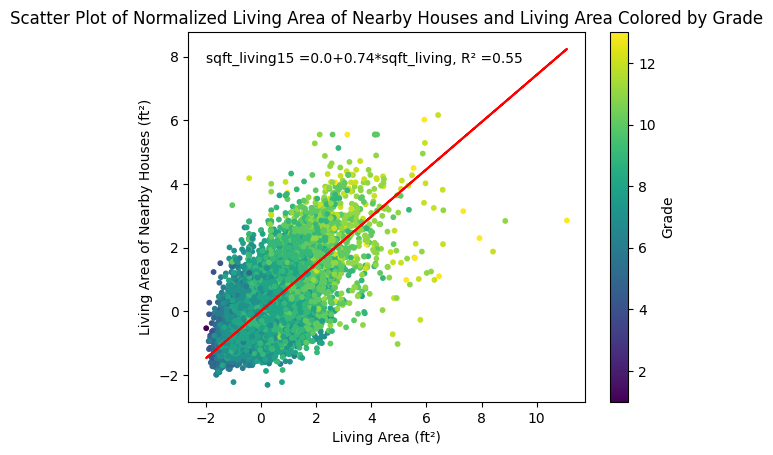

In [162]:
# sqft_living15 vs. sqft_living (and grade), normalized

fig = plt.figure()
plt.scatter(z_scaled['sqft_living'], z_scaled['sqft_living15'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_living'], z_scaled['sqft_living15'], 1)
line = slope * z_scaled['sqft_living'] + intercept
plt.plot(z_scaled['sqft_living'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_living']], z_scaled['sqft_living15'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_living']], z_scaled['sqft_living15'])

plt.text(-2, 7.8, ("sqft_living15 =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_living" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))

plt.title ('Scatter Plot of Normalized Living Area of Nearby Houses and Living Area Colored by Grade')
plt.xlabel('Living Area (ft\u00b2)')
plt.ylabel('Living Area of Nearby Houses (ft\u00b2)')
plt.show()

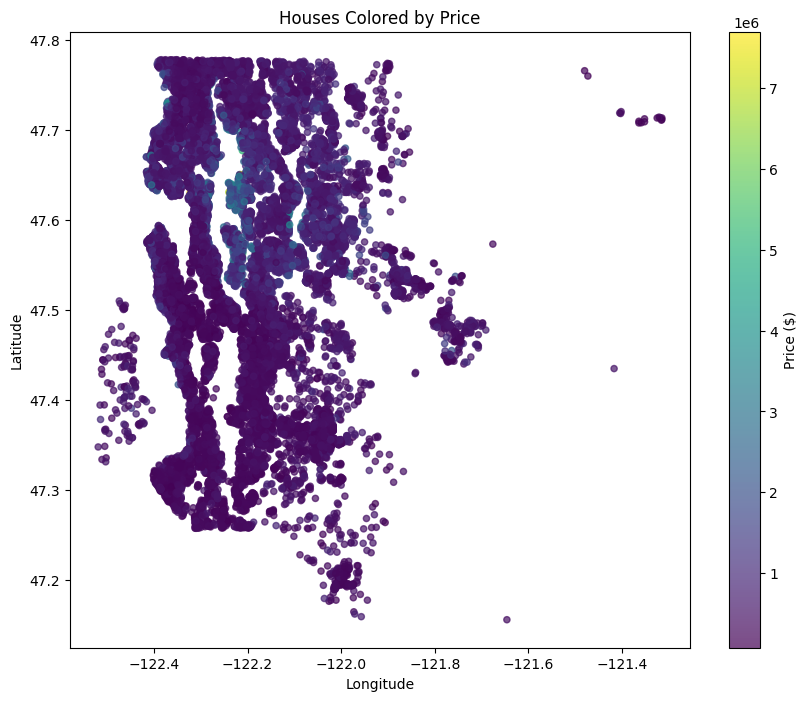

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Scatter plot
sc = plt.scatter(
    df['long'],       # x-axis = longitude
    df['lat'],        # y-axis = latitude
    c=df['price'],    # color by 'price'
    cmap='viridis',         # colormap
    s=20,                   # marker size
    alpha=0.7
)

plt.colorbar(sc, label='Price ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Houses Colored by Price')
plt.show()


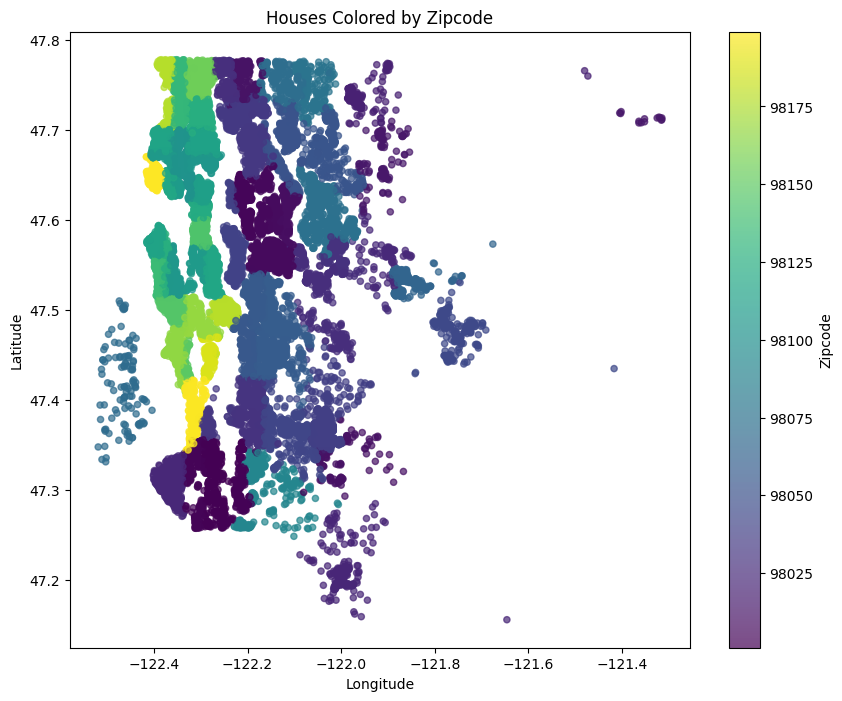

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Scatter plot
sc = plt.scatter(
    df['long'],       # x-axis = longitude
    df['lat'],        # y-axis = latitude
    c=df['zipcode'],    # color by 'price'
    cmap='viridis',         # colormap
    s=20,                   # marker size
    alpha=0.7
)

plt.colorbar(sc, label='Zipcode')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Houses Colored by Zipcode')
plt.show()

# **STEP 3: Data Analytics**
## -Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
## -Train, test, and provide accuracy and evaluation metrics for model results
